

```
`

# <center><b><font color='#00b4d8'>Evaluating the Performance of Machine Learning Models for Intrusion Detection on the UNSW_NB15 Dataset</font></b></center>

<center><b><font color='#`0077b6`'>SALMA LIDAME - AKRAM AIT SIMH - Ecole Superieur de Technologie - Meknes</font></b></center>

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Preprocessing</b>

### <font color='#*0077b6*'>**Exploring the UNSW NB15 Dataset: A Valuable Resource for Network Security Research** </font>


we are using the UNSW NB15 Dataset, from this link https://cloudstor.aarnet.edu.au/plus/index.php/s/2DhnLGDdEECo4ys?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20testing%20set

the UNSW NB15 is a publicly available network intrusion detection dataset that was released in 2015 by the University of New South Wales (UNSW) in Australia.It is a labeled dataset that contains network traffic data generated in a simulated military network environment. The dataset contains network traffic data that was collected in a research project aimed at developing techniques for detecting and mitigating network intrusions and attacks.

The UNSW NB15 dataset includes several different types of network traffic, including normal traffic as well as traffic generated by a variety of network attacks. The attacks in the dataset are grouped into four main categories: "reconnaissance", "backdoor", "denial of service (DoS)", and "exploitation.

This dataset has 49 features. There are 3 different datatypes :

· Categorical: proto, state, service, attack_cat

· Binary: is_sm_ips_ports, is_ftp_login

· Numerical: Rest of the features

The training set consists of 175,341 instances and the testing set consists of 82,332 instances.

The dataset has been widely used in research on network security and intrusion detection, and it continues to be a valuable resource for the development and testing of new security techniques and tools.

The dataset contains a total of 2.5 million network packets, captured over a period of 9 hours on a real-world network. The packets were captured using the tcpdump tool and were then preprocessed and labeled by the researchers.

The network traffic in the dataset was generated by a variety of applications and protocols, including HTTP, FTP, SMTP, SSH, and DNS, among others. The traffic was captured on a range of different ports and included both normal and malicious activity.

In addition to the main dataset, which includes both training and testing data, there are also three additional datasets that were derived from the main dataset. These include a reduced feature set dataset, a PCA-reduced dataset, and a subset of the original dataset that includes only normal traffic.

The UNSW NB15 dataset has been used in a variety of research projects, including the development of machine learning algorithms for intrusion detection, the evaluation of network anomaly detection techniques, and the testing of new security tools and systems, just like what are we going to do in this project.

### Configuring Jupyter Notebook & importing the libraries

In [1]:
from datetime import datetime

print("last update: {}".format(datetime.now())) 

last update: 2023-05-15 01:03:48.194416


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings
from IPython.core.display import HTML

# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates
from IPython.display import display, HTML




<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Loading then reading the Training and Testing datasets</b>

In [4]:
training_df = pd.read_csv("UNSW_NB15_training-set.csv")
test_df=pd.read_csv("UNSW_NB15_testing-set.csv")

In [5]:
training_df

id       dur proto service state  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl         sload        dload  sloss  dloss        sinpkt  dinpkt         sjit        djit  swin       stcpb       dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports attack_cat  label
0          1  0.000011   udp       -   INT      2      0     496       0   90909.090200   254     0  1.803636e+08     0.000000      0      0      0.011000     0.0     0.000000    0.000000     0           0           0     0  0.000000  0.000000  0.000000    248      0            0                  0           2             2           1                 1                 1               2             0           0                 0           1           2                0     Normal      0
1          2  0.000008   udp       -   INT      2      0    1762       0  125000.000300   254     0  8.810000e+08     0.000000      0      0      0.008000     0.0     0.000000    0.000000     0           0           0     0  0.000000  0.000000  0.000000    881      0            0                  0           2             2           1                 1                 1               2             0           0                 0           1           2                0     Normal      0
2          3  0.000005   udp       -   INT      2      0    1068       0  200000.005100   254     0  8.544000e+08     0.000000      0      0      0.005000     0.0     0.000000    0.000000     0           0           0     0  0.000000  0.000000  0.000000    534      0            0                  0           3             2           1                 1                 1               3             0           0                 0           1           3                0     Normal      0
3          4  0.000006   udp       -   INT      2      0     900       0  166666.660800   254     0  6.000000e+08     0.000000      0      0      0.006000     0.0     0.000000    0.000000     0           0           0     0  0.000000  0.000000  0.000000    450      0            0                  0           3             2           2                 2                 1               3             0           0                 0           2           3                0     Normal      0
4          5  0.000010   udp       -   INT      2      0    2126       0  100000.002500   254     0  8.504000e+08     0.000000      0      0      0.010000     0.0     0.000000    0.000000     0           0           0     0  0.000000  0.000000  0.000000   1063      0            0                  0           3             2           2                 2                 1               3             0           0                 0           2           3                0     Normal      0
...      ...       ...   ...     ...   ...    ...    ...     ...     ...            ...   ...   ...           ...          ...    ...    ...           ...     ...          ...         ...   ...         ...         ...   ...       ...       ...       ...    ...    ...          ...                ...         ...           ...         ...               ...               ...             ...           ...         ...               ...         ...         ...              ...        ...    ...
82327  82328  0.000005   udp       -   INT      2      0     104       0  200000.005100   254     0  8.320000e+07     0.000000      0      0      0.005000     0.0     0.000000    0.000000     0           0           0     0  0.000000  0.000000  0.000000     52      0            0                  0           1             2           2                 1                 1               2             0           0                 0           2           1                0     Normal      0
82328  82329  1.106101   tcp       -   FIN     20      8   18062  

In [6]:
test_df

id       dur proto service state  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl         sload          dload  sloss  dloss      sinpkt      dinpkt          sjit          djit  swin       stcpb       dtcpb  dwin    tcprtt    synack    ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports attack_cat  label
0            1  0.121478   tcp       -   FIN      6      4     258     172      74.087490   252   254  1.415894e+04    8495.365234      0      0   24.295600    8.375000     30.177547     11.830604   255   621772692  2202533631   255  0.000000  0.000000  0.000000     43     43            0                  0           1             0           1                 1                 1               1             0           0                 0           1           1                0     Normal      0
1            2  0.649902   tcp       -   FIN     14     38     734   42014      78.473372    62   252  8.395112e+03  503571.312500      2     17   49.915000   15.432865     61.426934   1387.778330   255  1417884146  3077387971   255  0.000000  0.000000  0.000000     52   1106            0                  0          43             1           1                 1                 1               2             0           0                 0           1           6                0     Normal      0
2            3  1.623129   tcp       -   FIN      8     16     364   13186      14.170161    62   252  1.572272e+03   60929.230470      1      6  231.875571  102.737203  17179.586860  11420.926230   255  2116150707  2963114973   255  0.111897  0.061458  0.050439     46    824            0                  0           7             1           2                 1                 1               3             0           0                 0           2           6                0     Normal      0
3            4  1.681642   tcp     ftp   FIN     12     12     628     770      13.677108    62   252  2.740179e+03    3358.622070      1      3  152.876547   90.235726    259.080172   4991.784669   255  1107119177  1047442890   255  0.000000  0.000000  0.000000     52     64            0                  0           1             1           2                 1                 1               3             1           1                 0           2           1                0     Normal      0
4            5  0.449454   tcp       -   FIN     10      6     534     268      33.373826   254   252  8.561499e+03    3987.059814      2      1   47.750333   75.659602   2415.837634    115.807000   255  2436137549  1977154190   255  0.128381  0.071147  0.057234     53     45            0                  0          43             1           2                 2                 1              40             0           0                 0           2          39                0     Normal      0
...        ...       ...   ...     ...   ...    ...    ...     ...     ...            ...   ...   ...           ...            ...    ...    ...         ...         ...           ...           ...   ...         ...         ...   ...       ...       ...       ...    ...    ...          ...                ...         ...           ...         ...               ...               ...             ...           ...         ...               ...         ...         ...              ...        ...    ...
175336  175337  0.000009   udp     dns   INT      2      0     114       0  111111.107200   254     0  5.066666e+07       0.000000      0      0    0.009000    0.000000      0.000000      0.000000     0           0           0     0  0.000000  0.000000  0.000000     57      0            0                  0          24             2          24                24                13              24             0           0                 0          24          24                0    Generic    

In [7]:
df = pd.read_csv('pfe_dataset.csv')

In [8]:
df

id       dur proto service state  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl         sload        dload  sloss  dloss     sinpkt    dinpkt         sjit        djit  swin       stcpb       dtcpb  dwin   tcprtt    synack    ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports attack_cat  label
0            1  0.000011   udp       -   INT      2      0     496       0   90909.090200   254     0  1.803636e+08     0.000000      0      0   0.011000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000    248      0            0                  0           2             2           1                 1                 1               2             0           0                 0           1           2                0     Normal      0
1            2  0.000008   udp       -   INT      2      0    1762       0  125000.000300   254     0  8.810000e+08     0.000000      0      0   0.008000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000    881      0            0                  0           2             2           1                 1                 1               2             0           0                 0           1           2                0     Normal      0
2            3  0.000005   udp       -   INT      2      0    1068       0  200000.005100   254     0  8.544000e+08     0.000000      0      0   0.005000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000    534      0            0                  0           3             2           1                 1                 1               3             0           0                 0           1           3                0     Normal      0
3            4  0.000006   udp       -   INT      2      0     900       0  166666.660800   254     0  6.000000e+08     0.000000      0      0   0.006000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000    450      0            0                  0           3             2           2                 2                 1               3             0           0                 0           2           3                0     Normal      0
4            5  0.000010   udp       -   INT      2      0    2126       0  100000.002500   254     0  8.504000e+08     0.000000      0      0   0.010000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000   1063      0            0                  0           3             2           2                 2                 1               3             0           0                 0           2           3                0     Normal      0
...        ...       ...   ...     ...   ...    ...    ...     ...     ...            ...   ...   ...           ...          ...    ...    ...        ...       ...          ...         ...   ...         ...         ...   ...      ...       ...       ...    ...    ...          ...                ...         ...           ...         ...               ...               ...             ...           ...         ...               ...         ...         ...              ...        ...    ...
257668  175337  0.000009   udp     dns   INT      2      0     114       0  111111.107200   254     0  5.066666e+07     0.000000      0      0   0.009000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000     57      0            0                  0          24             2          24                24                13              24             0           0                 0          24          24                0    Generic      1
257669  175338  0.505762   tcp       -   FIN     10      8     620  

In [9]:
# show the columns of the dataset
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

>>  <b><font color='#00b4d8'>Breaking Down the UNSW NB15 Dataset: Explanation of Each Attribute</font></b>

## explaination : 
'id': A unique identifier for each record in the dataset.

'dur': The duration of the connection in seconds. This feature can be useful in identifying certain types of attacks that involve long or short connections.

'proto': The protocol used for the connection, such as TCP or UDP. This feature can help in identifying attacks that target specific protocols.

'service': The type of service used in the connection, such as HTTP or FTP. This feature can help in identifying attacks that target specific services.

'state': The state of the connection, such as established or closed. This feature can help in identifying attacks that involve unusual connection states.

'spkts': The number of packets sent by the source host.

'dpkts': The number of packets sent by the destination host.

'sbytes': The number of bytes sent by the source host.

'dbytes': The number of bytes sent by the destination host.

'rate': The transfer rate of the connection in bytes/second.

'sttl': The number of hops (TTL) that the packet can travel before being discarded.

'dttl': The number of hops (TTL) that the packet can travel before being discarded on the destination host.

'sload': The load of the connection sent by the source host.

'dload': The load of the connection sent by the destination host.

'sloss': The number of packets lost in the source direction.

'dloss': The number of packets lost in the destination direction.

'sinpkt': The average time between two packets sent by the source host.

'dinpkt': The average time between two packets sent by the destination host.

'sjit': The standard deviation of the time between two packets sent by the source host.

'djit': The standard deviation of the time between two packets sent by the destination host.

'swin': The size of the TCP window advertised by the source host.

'stcpb': The number of TCP bytes sent by the source host.

'dtcpb': The number of TCP bytes sent by the destination host.

'dwin': The size of the TCP window advertised by the destination host.

'tcprtt': The TCP round trip time.

'synack': The time between sending a SYN packet and receiving an ACK packet.

'ackdat': The time between sending an ACK packet and receiving data.

'smean': The mean packet size sent by the source host.

'dmean': The mean packet size sent by the destination host.

'trans_depth': The number of HTTP transactions in the connection.

'response_body_len': The length of the HTTP response body.

'ct_srv_src': The number of connections to the same service from the same source host.

'ct_state_ttl': The number of connections with the same state and TTL values.

'ct_dst_ltm': The number of connections with the same destination host and port in the last two minutes.

'ct_src_dport_ltm': The number of connections with the same source host and destination port in the last two minutes.

'ct_dst_sport_ltm': The number of connections with the same destination host and source port in the last two minutes.

'ct_dst_src_ltm': The number of connections with the same source and destination hosts and ports in the last two minutes

'dmean': The mean packet size sent by the destination host.

'trans_depth': The number of HTTP transactions in the connection.

'response_body_len': The length of the HTTP response body.

'ct_srv_src': The number of connections to the same service from the same source host.

'ct_state_ttl': The number of connections with the same state and TTL values.

'ct_dst_ltm': The number of connections with the same destination host and port in the last two minutes.

'ct_src_dport_ltm': The number of connections with the same source host and destination port in the last two minutes.

'ct_dst_sport_ltm': The number of connections with the same destination host and source port in the last two minutes.

'ct_dst_src_ltm': The number of connections with the same source and destination hosts and ports in the last two minutes

In [10]:
# print the first 10 rows of the dataset
df.head(10)

id       dur proto service state  spkts  dpkts  sbytes  dbytes          rate  sttl  dttl         sload  dload  sloss  dloss     sinpkt  dinpkt  sjit  djit  swin  stcpb  dtcpb  dwin  tcprtt  synack  ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports attack_cat  label
0   1  0.000011   udp       -   INT      2      0     496       0   90909.09020   254     0  1.803636e+08    0.0      0      0      0.011     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    248      0            0                  0           2             2           1                 1                 1               2             0           0                 0           1           2                0     Normal      0
1   2  0.000008   udp       -   INT      2      0    1762       0  125000.00030   254     0  8.810000e+08    0.0      0      0      0.008     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    881      0            0                  0           2             2           1                 1                 1               2             0           0                 0           1           2                0     Normal      0
2   3  0.000005   udp       -   INT      2      0    1068       0  200000.00510   254     0  8.544000e+08    0.0      0      0      0.005     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    534      0            0                  0           3             2           1                 1                 1               3             0           0                 0           1           3                0     Normal      0
3   4  0.000006   udp       -   INT      2      0     900       0  166666.66080   254     0  6.000000e+08    0.0      0      0      0.006     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    450      0            0                  0           3             2           2                 2                 1               3             0           0                 0           2           3                0     Normal      0
4   5  0.000010   udp       -   INT      2      0    2126       0  100000.00250   254     0  8.504000e+08    0.0      0      0      0.010     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0   1063      0            0                  0           3             2           2                 2                 1               3             0           0                 0           2           3                0     Normal      0
5   6  0.000003   udp       -   INT      2      0     784       0  333333.32150   254     0  1.045333e+09    0.0      0      0      0.003     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    392      0            0                  0           2             2           2                 2                 1               2             0           0                 0           2           2                0     Normal      0
6   7  0.000006   udp       -   INT      2      0    1960       0  166666.66080   254     0  1.306667e+09    0.0      0      0      0.006     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    980      0            0                  0           2             2           2                 2                 1               2             0           0                 0           2           2                0     Normal      0
7   8  0.000028   udp       -   INT      2      0    1384       0   35714.28522   254     0  1.977143e+08    0.0      0      0      0.028     0.0   0.0   0.0     0      0      0     0     0.0     0.0     0.0    692      0            0                  0           3             2           1                 1                 1               3             0           0                 0           1           3                

In [11]:
# print the last 10 rows of the dataset
df.tail(10)

id       dur proto service state  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl         sload        dload  sloss  dloss     sinpkt    dinpkt         sjit        djit  swin       stcpb       dtcpb  dwin   tcprtt    synack    ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports attack_cat  label
257663  175332  0.000008   udp     dns   INT      2      0     114       0  125000.000300   254     0  5.700000e+07     0.000000      0      0   0.008000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000     57      0            0                  0          45             2          12                12                12              45             0           0                 0          12          45                0    Generic      1
257664  175333  0.000008   udp     dns   INT      2      0     114       0  125000.000300   254     0  5.700000e+07     0.000000      0      0   0.008000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000     57      0            0                  0          45             2          12                12                12              45             0           0                 0          12          45                0    Generic      1
257665  175334  0.000006   udp     dns   INT      2      0     114       0  166666.660800   254     0  7.600000e+07     0.000000      0      0   0.006000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000     57      0            0                  0          45             2          33                33                17              45             0           0                 0          33          45                0    Generic      1
257666  175335  0.000006   udp     dns   INT      2      0     114       0  166666.660800   254     0  7.600000e+07     0.000000      0      0   0.006000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000     57      0            0                  0          45             2          33                33                17              45             0           0                 0          33          45                0    Generic      1
257667  175336  0.000006   udp     dns   INT      2      0     114       0  166666.660800   254     0  7.600000e+07     0.000000      0      0   0.006000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000     57      0            0                  0          45             2          33                33                17              45             0           0                 0          33          45                0    Generic      1
257668  175337  0.000009   udp     dns   INT      2      0     114       0  111111.107200   254     0  5.066666e+07     0.000000      0      0   0.009000   0.00000     0.000000    0.000000     0           0           0     0  0.00000  0.000000  0.000000     57      0            0                  0          24             2          24                24                13              24             0           0                 0          24          24                0    Generic      1
257669  175338  0.505762   tcp       -   FIN     10      8     620     354      33.612649   254   252  8.826286e+03  4903.492188      2      1  54.400111  66.98057  3721.068786  120.177727   255  3518776216  3453092386   255  0.09944  0.036895  0.062545     62     44            0                  0           1             1           1                 1                 1               2             0           0                 0           1           1                0  Shellcode      1
257670  175339  0.000009   udp     dns   INT      2      0     114  

In [12]:
# print a statistical description of the dataset
df.describe(include="all")

id            dur   proto service   state          spkts          dpkts        sbytes        dbytes          rate           sttl           dttl         sload         dload          sloss          dloss         sinpkt         dinpkt          sjit           djit           swin         stcpb         dtcpb           dwin         tcprtt         synack         ackdat          smean          dmean    trans_depth  response_body_len     ct_srv_src   ct_state_ttl     ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  ct_flw_http_mthd     ct_src_ltm     ct_srv_dst  is_sm_ips_ports attack_cat          label
count   257673.000000  257673.000000  257673  257673  257673  257673.000000  257673.000000  2.576730e+05  2.576730e+05  2.576730e+05  257673.000000  257673.000000  2.576730e+05  2.576730e+05  257673.000000  257673.000000  257673.000000  257673.000000  2.576730e+05  257673.000000  257673.000000  2.576730e+05  2.576730e+05  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000  257673.000000       2.576730e+05  257673.000000  257673.000000  257673.000000     257673.000000     257673.000000   257673.000000  257673.000000  257673.000000     257673.000000  257673.000000  257673.000000    257673.000000     257673  257673.000000
unique            NaN            NaN     133      13      11            NaN            NaN           NaN           NaN           NaN            NaN            NaN           NaN           NaN            NaN            NaN            NaN            NaN           NaN            NaN            NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN                NaN            NaN            NaN            NaN               NaN               NaN             NaN            NaN            NaN               NaN            NaN            NaN              NaN         10            NaN
top               NaN            NaN     tcp       -     FIN            NaN            NaN           NaN           NaN           NaN            NaN            NaN           NaN           NaN            NaN            NaN            NaN            NaN           NaN            NaN            NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN                NaN            NaN            NaN            NaN               NaN               NaN             NaN            NaN            NaN               NaN            NaN            NaN              NaN     Normal            NaN
freq              NaN            NaN  123041  141321  117164            NaN            NaN           NaN           NaN           NaN            NaN            NaN           NaN           NaN            NaN            NaN            NaN            NaN           NaN            NaN            NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN                NaN            NaN            NaN            NaN               NaN               NaN             NaN            NaN            NaN               NaN            NaN            NaN              NaN      93000            NaN
mean     72811.823858       1.246715     NaN     NaN     NaN      19.777144      18.514703  8.572952e+03  1.438729e+04  9.125391e+04     180.000931      84.754957  7.060869e+07  6.582143e+05       4.889317       6.743691     912.300834      98.915462  5.419373e+03     582.251456     121.753661  1.006120e+09  1.002295e+09     119.254629       0.046038       0.023652       0.022386     137.639027     121.649703       0.102242       1.968900e+03       9.383176       1.324978       6.050467          5.238271          4.032677        8.322964       0.012819       0.012850          0.132005       6.800045       9.121049         0.014274        NaN       0.639077
std      48929.917641       5

>> cell above returns a statistical summary of our dataframe , including count, mean, standard deviation, minimum, and maximum values, as well as quartile information, for each column in the dataframe. By specifying include='all', the summary also includes information about non-numeric columns, such as the number of unique values, the most frequent value, and the frequency of the most frequent value.

In [13]:
# show the number of unique values in each column 
df.nunique()

id                   175341
dur                  109945
proto                   133
service                  13
state                    11
spkts                   646
dpkts                   627
sbytes                 9382
dbytes                 8653
rate                 115763
sttl                     13
dttl                      9
sload                121356
dload                116380
sloss                   490
dloss                   476
sinpkt               114318
dinpkt               110270
sjit                 117101
djit                 114861
swin                     22
stcpb                114473
dtcpb                114187
dwin                     19
tcprtt                63878
synack                57366
ackdat                53248
smean                  1377
dmean                  1362
trans_depth              14
response_body_len      2819
ct_srv_src               57
ct_state_ttl              7
ct_dst_ltm               52
ct_src_dport_ltm         52
ct_dst_sport_ltm    

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [15]:
df.isnull().values.any()

False

There is no duplicate record.

In [16]:
# Checking for duplicates
print(df.duplicated().sum())

0


In [17]:
# is there any NaN (null values - missing values) in the dataset
print(df.isna().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

There is no missing value.

In [18]:
df['label'].value_counts().head().index

Int64Index([1, 0], dtype='int64')

#### Checking the balance between benign (legitimate traffic) and attack data

<AxesSubplot:>

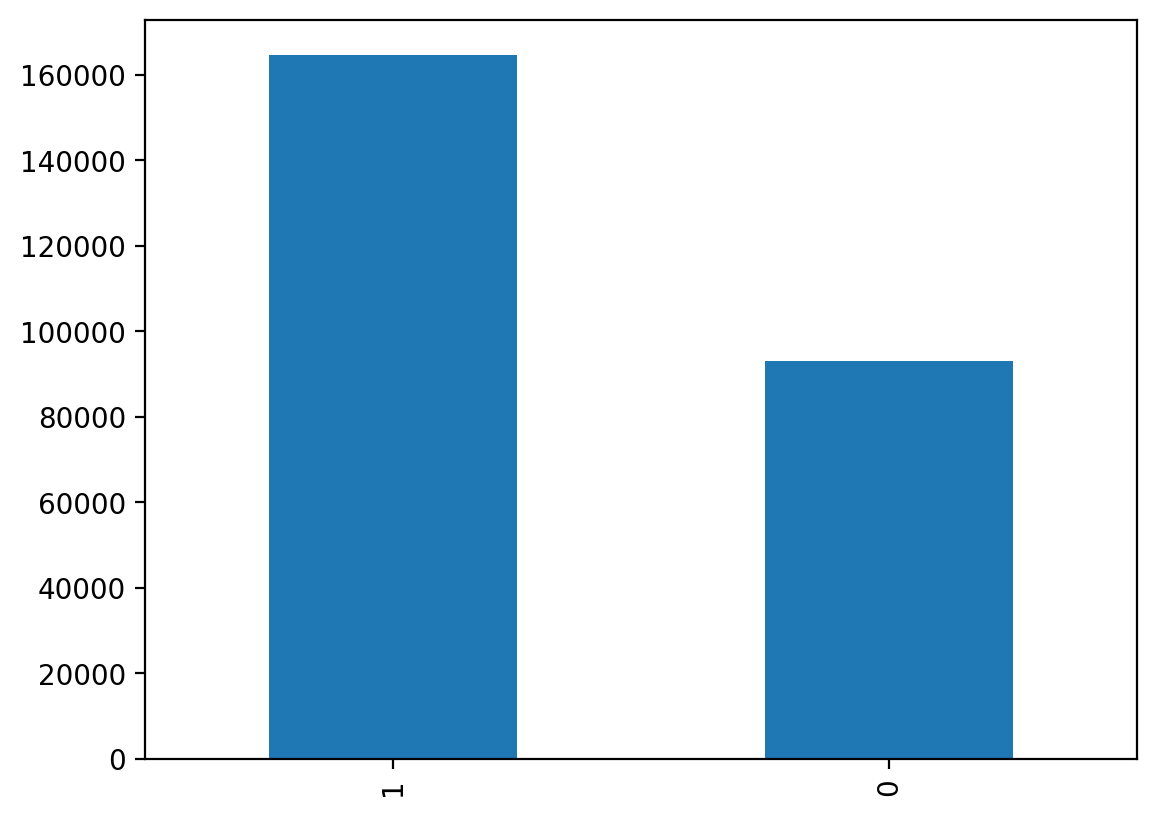

In [19]:
df['label'].value_counts().plot.bar()

In [20]:
df['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

The ratio between attack and normal data is not equal, but just slightly imbalanced. Therefore, we will not do a sampling fix here.

NB : Sampling fixes involve altering the distribution of data to mitigate this issue of imbalanced datasets, where the number of instances belonging to one class is significantly larger than the other class(es).. There are two main types of sampling fixes: undersampling and oversampling.

**Undersampling**: This involves randomly selecting a subset of the majority class samples to balance the class distribution. This technique reduces the size of the majority class and may result in the loss of some information, but can be an effective way to balance the dataset.

**Oversampling**: This involves generating additional samples for the minority class to balance the class distribution. This can be done by duplicating existing samples, creating synthetic samples using techniques like SMOTE (Synthetic Minority Over-sampling Technique), or a combination of both.

In [21]:
df['attack_cat'].value_counts().index

Index(['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance',
       'Analysis', 'Backdoor', 'Shellcode', 'Worms'],
      dtype='object')

>> explaining every attack type :

* Normal : Represents normal network traffic that is not malicious.
* Generic: Represents attack types that cannot be easily categorized into other types due to the lack of information available.
* Exploits: Refers to attacks that exploit known vulnerabilities in software or systems.
* Fuzzers: Refers to attacks that attempt to discover vulnerabilities by sending random or malformed data to applications or systems.
* DoS (Denial of Service): Refers to attacks that aim to overwhelm or shut down a system, service or network by sending a large number of requests or traffic to it.
* Reconnaissance: Refers to attacks that are used to gather information about a system, network or organization, which can be used in subsequent attacks.
* Analysis: Refers to attacks that are used to test the vulnerability of a system or network and to gather information for future attacks.
* Backdoor: Refers to a type of malware that allows an attacker to gain unauthorized access to a system or network, bypassing normal authentication mechanisms.
* Shellcode: Refers to a piece of code that is used to exploit a vulnerability in a system or network, allowing an attacker to execute arbitrary code or commands.
* Worms: Refers to self-replicating malware that can spread across a network or the internet, infecting other systems and causing damage.

In [22]:
df['service'].value_counts().index

Index(['-', 'dns', 'http', 'smtp', 'ftp-data', 'ftp', 'pop3', 'ssh', 'dhcp',
       'snmp', 'ssl', 'irc', 'radius'],
      dtype='object')


>> explaining every Service :
    
* DNS - Translates domain names into IP addresses
* HTTP - Protocol for transferring data over the web
* SMTP - Protocol for sending and receiving email messages
* FTP-data - Protocol for transferring files (handles data transfer)
* FTP - Protocol for transferring files (manages connection)
* POP3 - Protocol for retrieving email messages from a mail server
* SSH - Protocol for secure remote access to computers and servers
* DHCP - Protocol for assigning IP addresses to devices on a network
* SNMP - Protocol for managing and monitoring network devices
* SSL - Protocol for secure communication over the internet
* IRC - Protocol for real-time text communication over the internet
* RADIUS - Protocol for authenticating users and devices on a network

In [23]:
df['proto'].value_counts().index

Index(['tcp', 'udp', 'unas', 'arp', 'ospf', 'sctp', 'any', 'gre', 'rsvp',
       'ipv6',
       ...
       'sat-expak', 'egp', 'hmp', 'crtp', 'argus', 'netblt', 'rdp', 'igmp',
       'icmp', 'rtp'],
      dtype='object', length=133)

>> explaining every protocol :
* TCP (Transmission Control Protocol): A widely used transport layer protocol for reliable, ordered, and error-checked delivery of data between applications running on different hosts in a network.
* UDP (User Datagram Protocol): A lightweight transport layer protocol that provides unreliable delivery of data between applications.
* UNAS (Unassigned): A protocol that is not currently assigned to any specific application or service.
* ARP (Address Resolution Protocol): A protocol used to map a network address (such as an IP address) to a physical address (such as a MAC address) for communication between hosts on a local network.
* OSPF (Open Shortest Path First): A protocol used for routing traffic within an autonomous system (AS) in a network.
* SCTP (Stream Control Transmission Protocol): A transport layer protocol that provides reliable, ordered, and error-checked delivery of data between applications.

* ANY: A protocol that can refer to any protocol that is currently in use on a network.
* GRE (Generic Routing Encapsulation): A protocol used to encapsulate one protocol inside another protocol for transport over an IP network.
* RSVP (Resource Reservation Protocol): A protocol used to reserve network resources (such as bandwidth) for specific applications or services in a network.
* IPv6 (Internet Protocol version 6): The latest version of the Internet Protocol, which provides a larger address space, improved security, and other enhancements over IPv4.
* SAT-EXPAK: A protocol used for satellite links to exchange data between ground stations and satellites.
* EGP (Exterior Gateway Protocol): A protocol used to exchange routing information between different ASs in a network.
* HMP (Host Monitoring Protocol): A protocol used to monitor the status and performance of hosts on a network.
* CRTP (Compressed Real-time Transport Protocol): A protocol used to compress real-time traffic (such as voice or video) for transport over a network.
* ARGUS: A protocol used for network auditing and analysis.
* NETBLT: A protocol used for high-speed data transfer over a network.
* RDP (Reliable Data Protocol): A protocol used for reliable delivery of data between applications.
* IGMP (Internet Group Management Protocol): A protocol used to manage and monitor multicast group memberships on a network.
* ICMP (Internet Control Message Protocol): A protocol used to report errors and provide diagnostic information for IP network problems.
* RTP (Real-time Transport Protocol): A protocol used for transmitting real-time audio and video over a network.

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b> Visualisation </b>

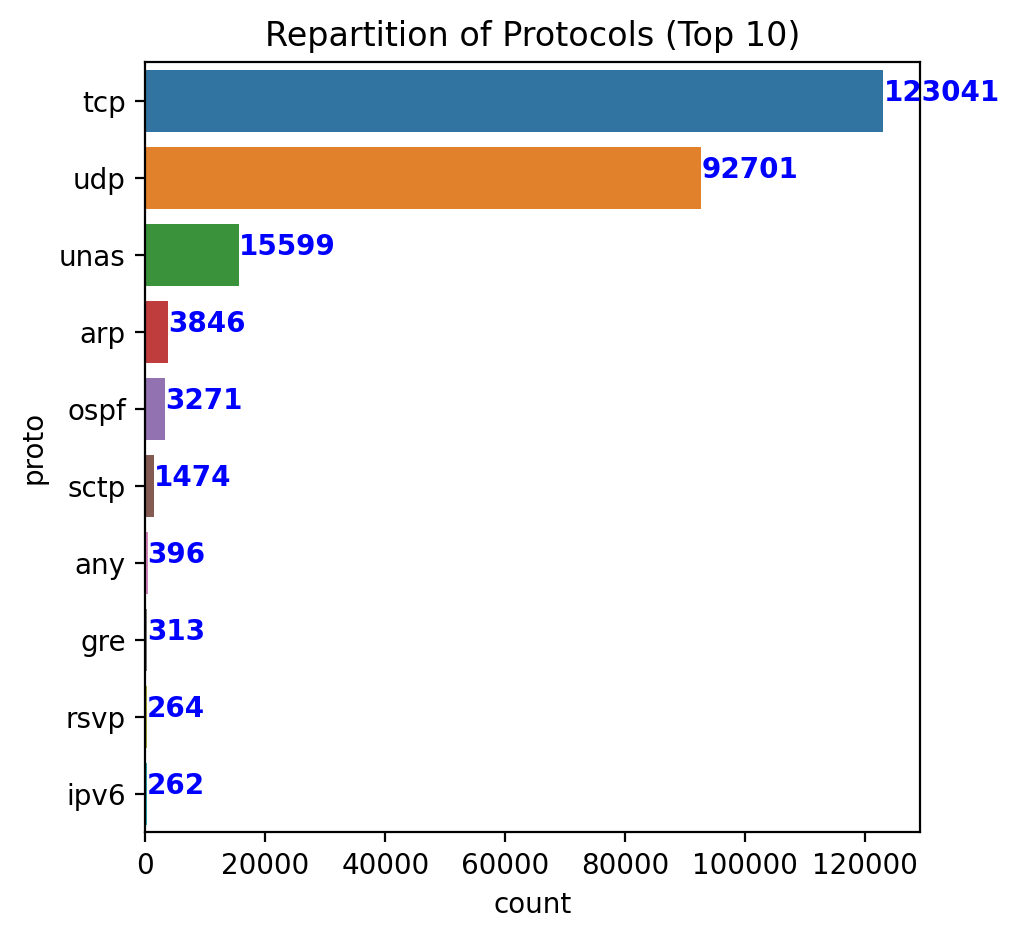

In [24]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
top_proto = df['proto'].value_counts().head(10)
cplot = sns.countplot(y="proto", data=df, order=top_proto.index)
for i, v in enumerate(top_proto):
    cplot.text(v + 1, i, str(v), color='blue', fontweight='bold')

cplot.set_title("Repartition of Protocols (Top 10)")
plt.show()


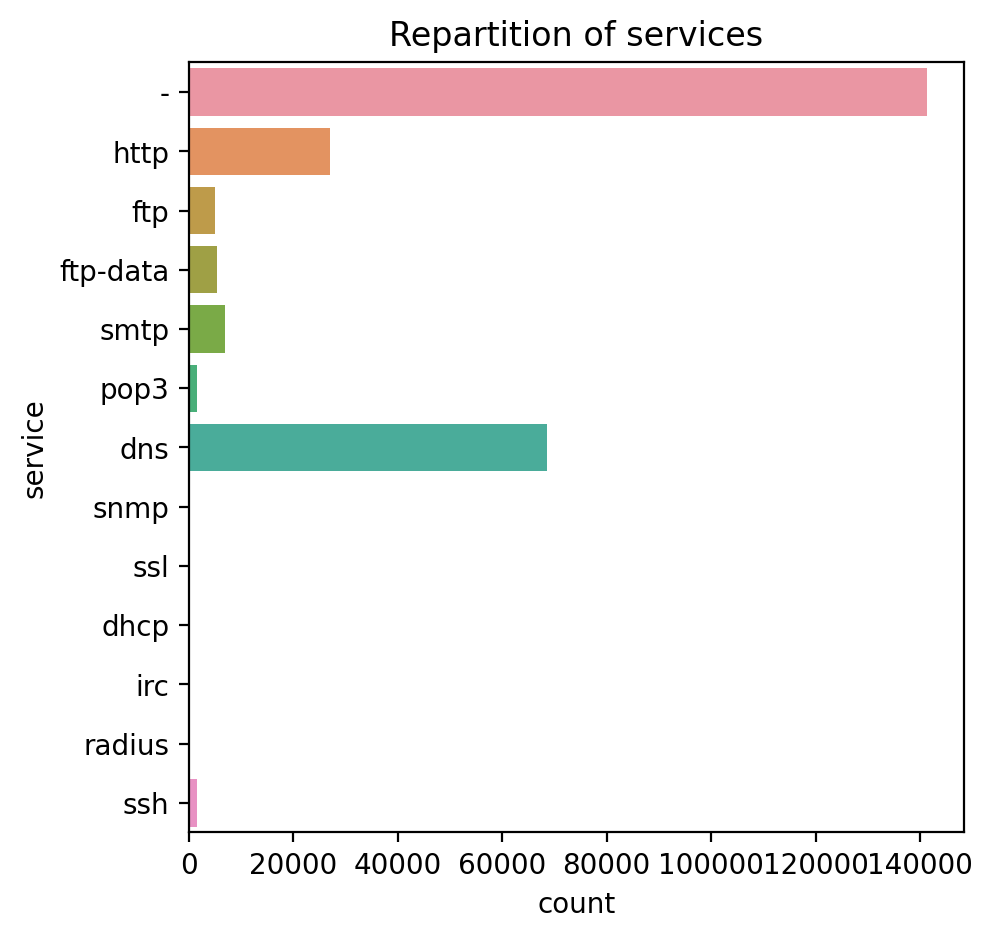

In [25]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
cplot = sns.countplot(y="service", data=df)
cplot.set_title("Repartition of services")
plt.show()

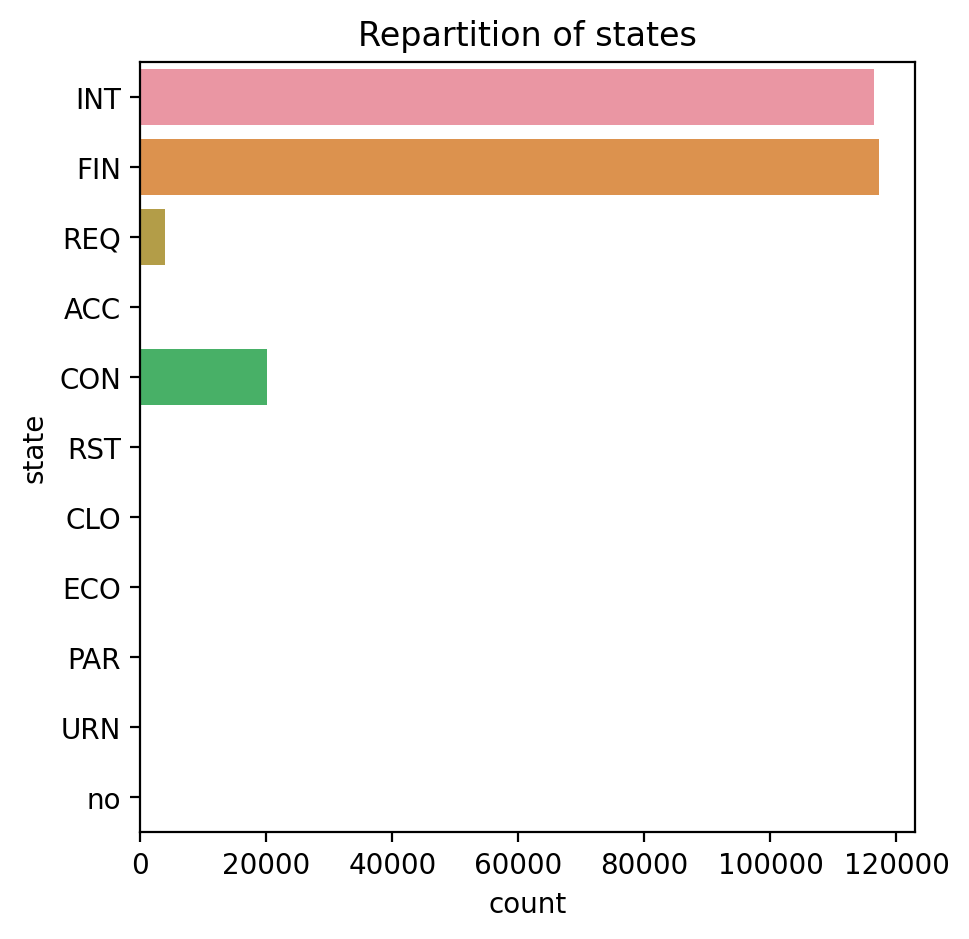

In [26]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
cplot = sns.countplot(y="state", data=df)
cplot.set_title("Repartition of states")
plt.show()

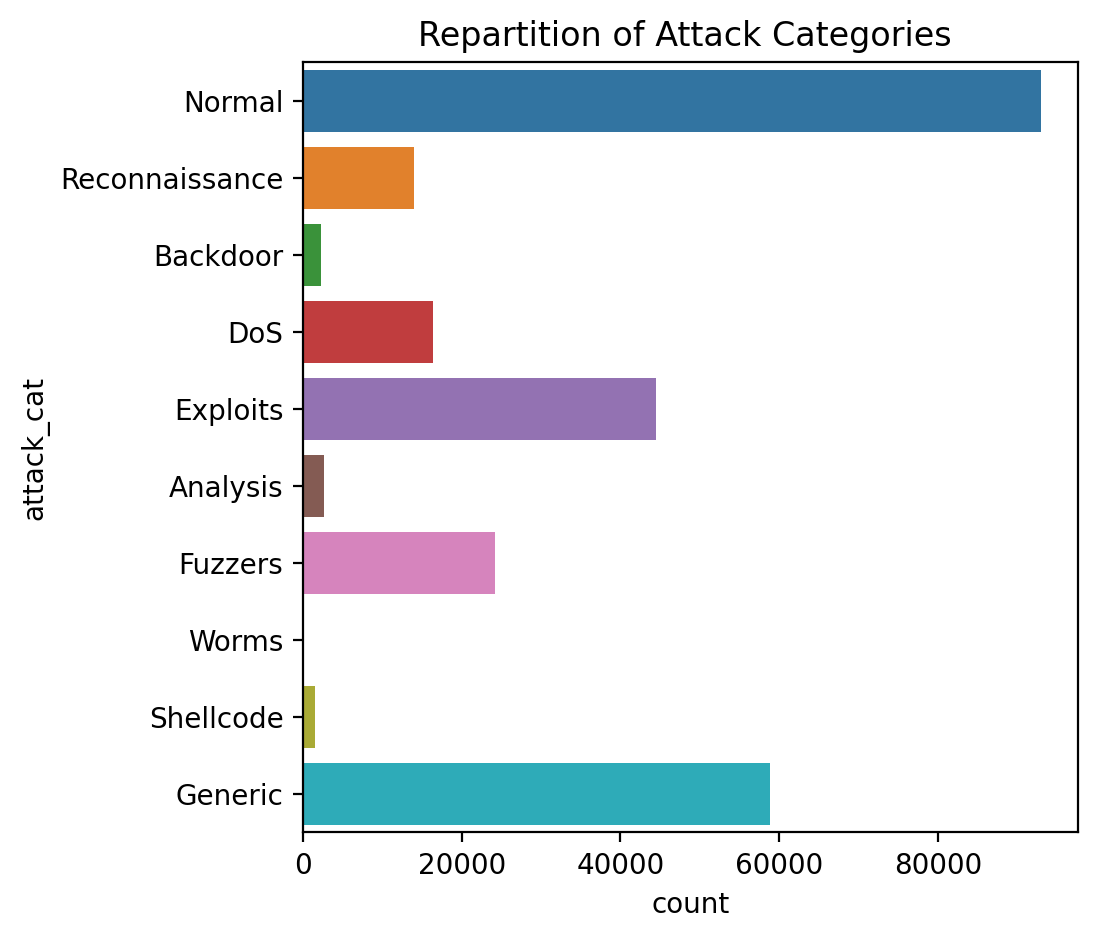

In [27]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
cplot = sns.countplot(y="attack_cat", data=df[['attack_cat']])
cplot.set_title("Repartition of Attack Categories ")
plt.show()

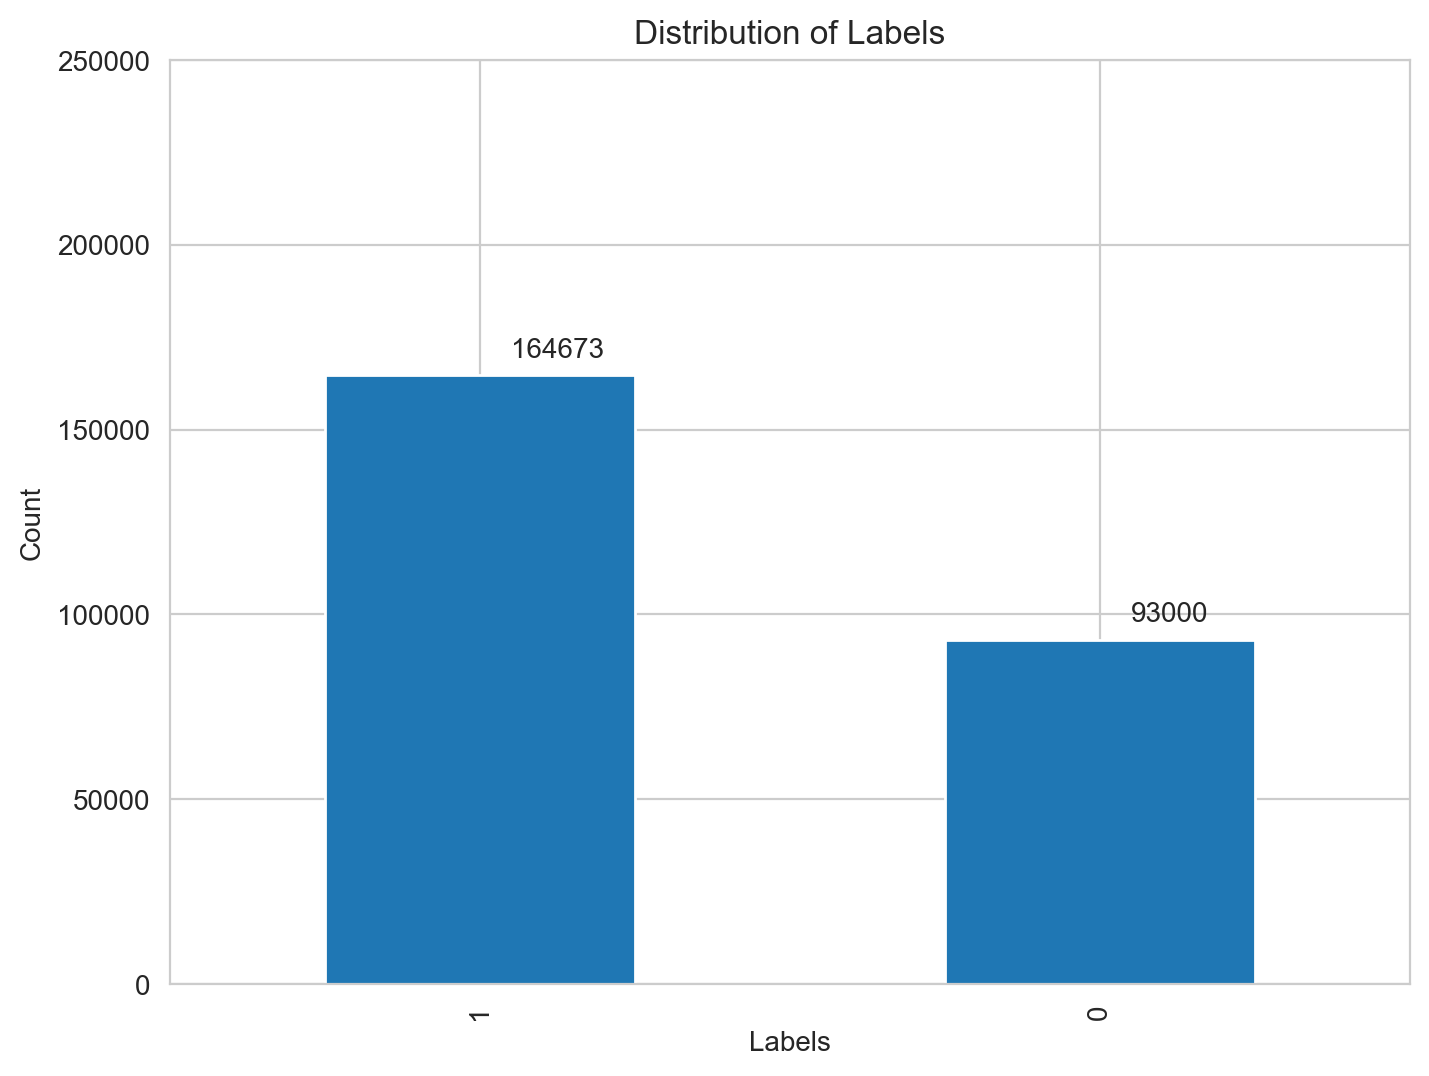

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = df['label'].value_counts().plot(kind='bar')
ax.set_title("Distribution of Labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Count")
ax.set_ylim([0, 250000])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+5000))

plt.show()


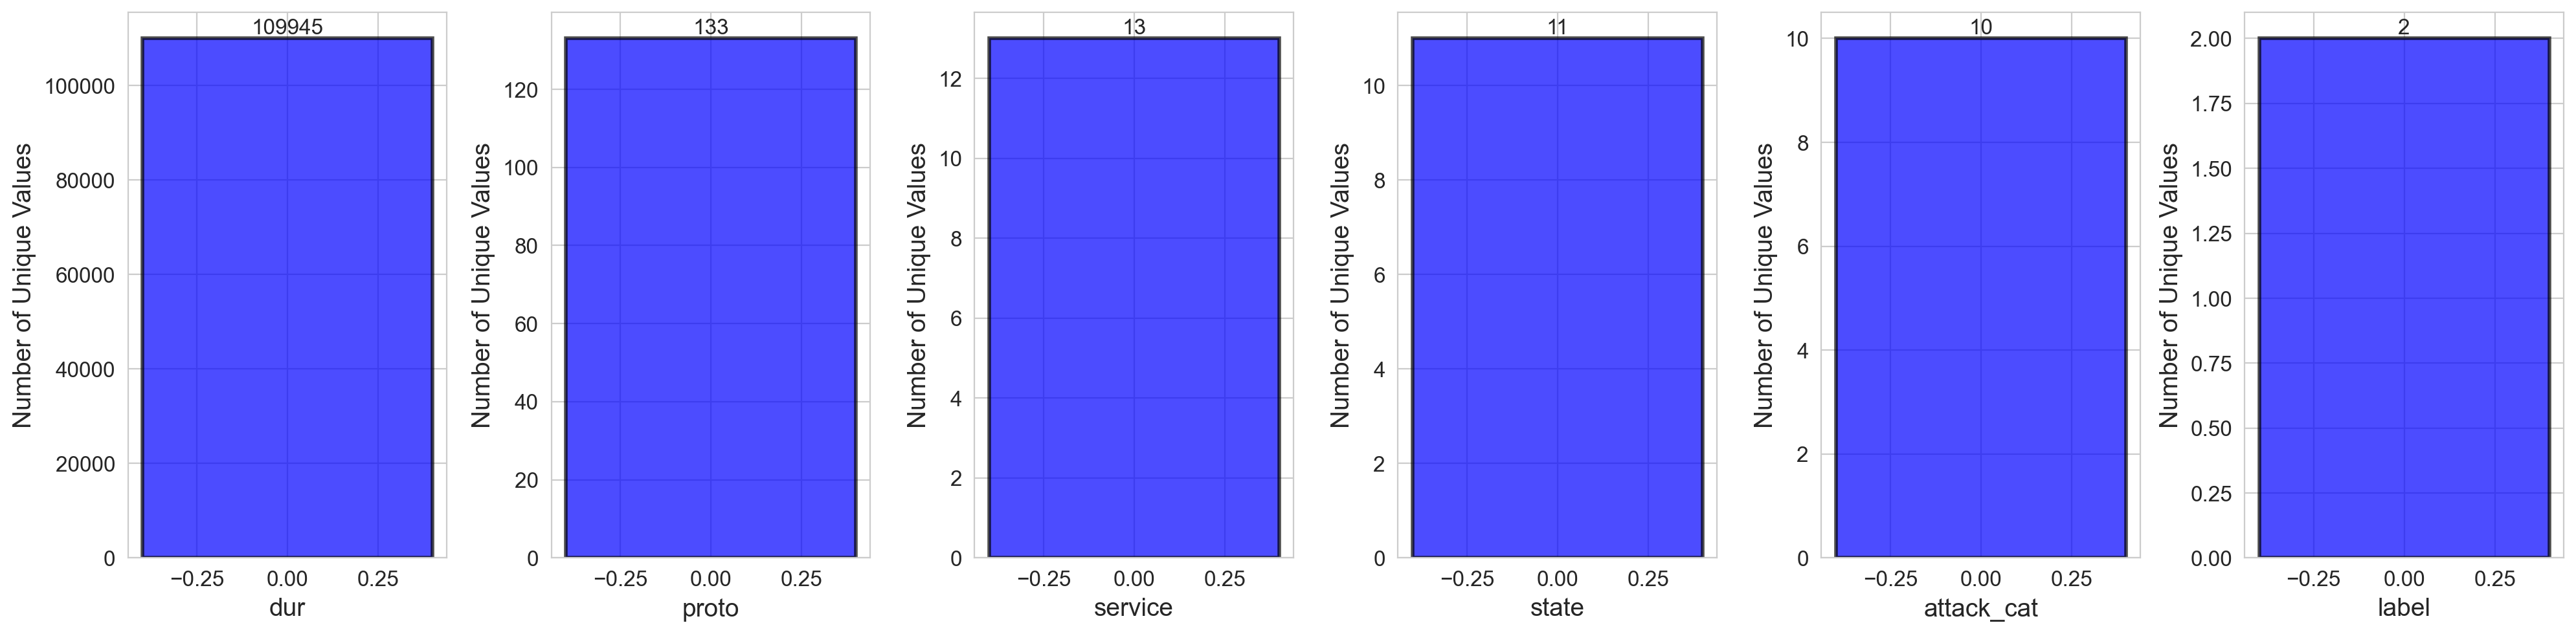

In [29]:
df_columns=['dur', 'proto', 'service', 'state', 'attack_cat', 'label']

dff_columns=df[df_columns]
dff_columns
fig, axes = plt.subplots(nrows=1, ncols=len(dff_columns.columns), figsize=(20, 5))

for col, ax in zip(dff_columns.columns, axes):
    unique_counts = pd.Series(dff_columns[col].nunique())
    ax.bar(unique_counts.index, unique_counts.values, width=0.8, alpha=0.7, color='b', edgecolor='k', linewidth=2)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Number of Unique Values', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    for j, v in enumerate(unique_counts.values):
        ax.text(j, v, str(v), ha='center', va='bottom', fontsize=12)
    
plt.tight_layout()
plt.show()

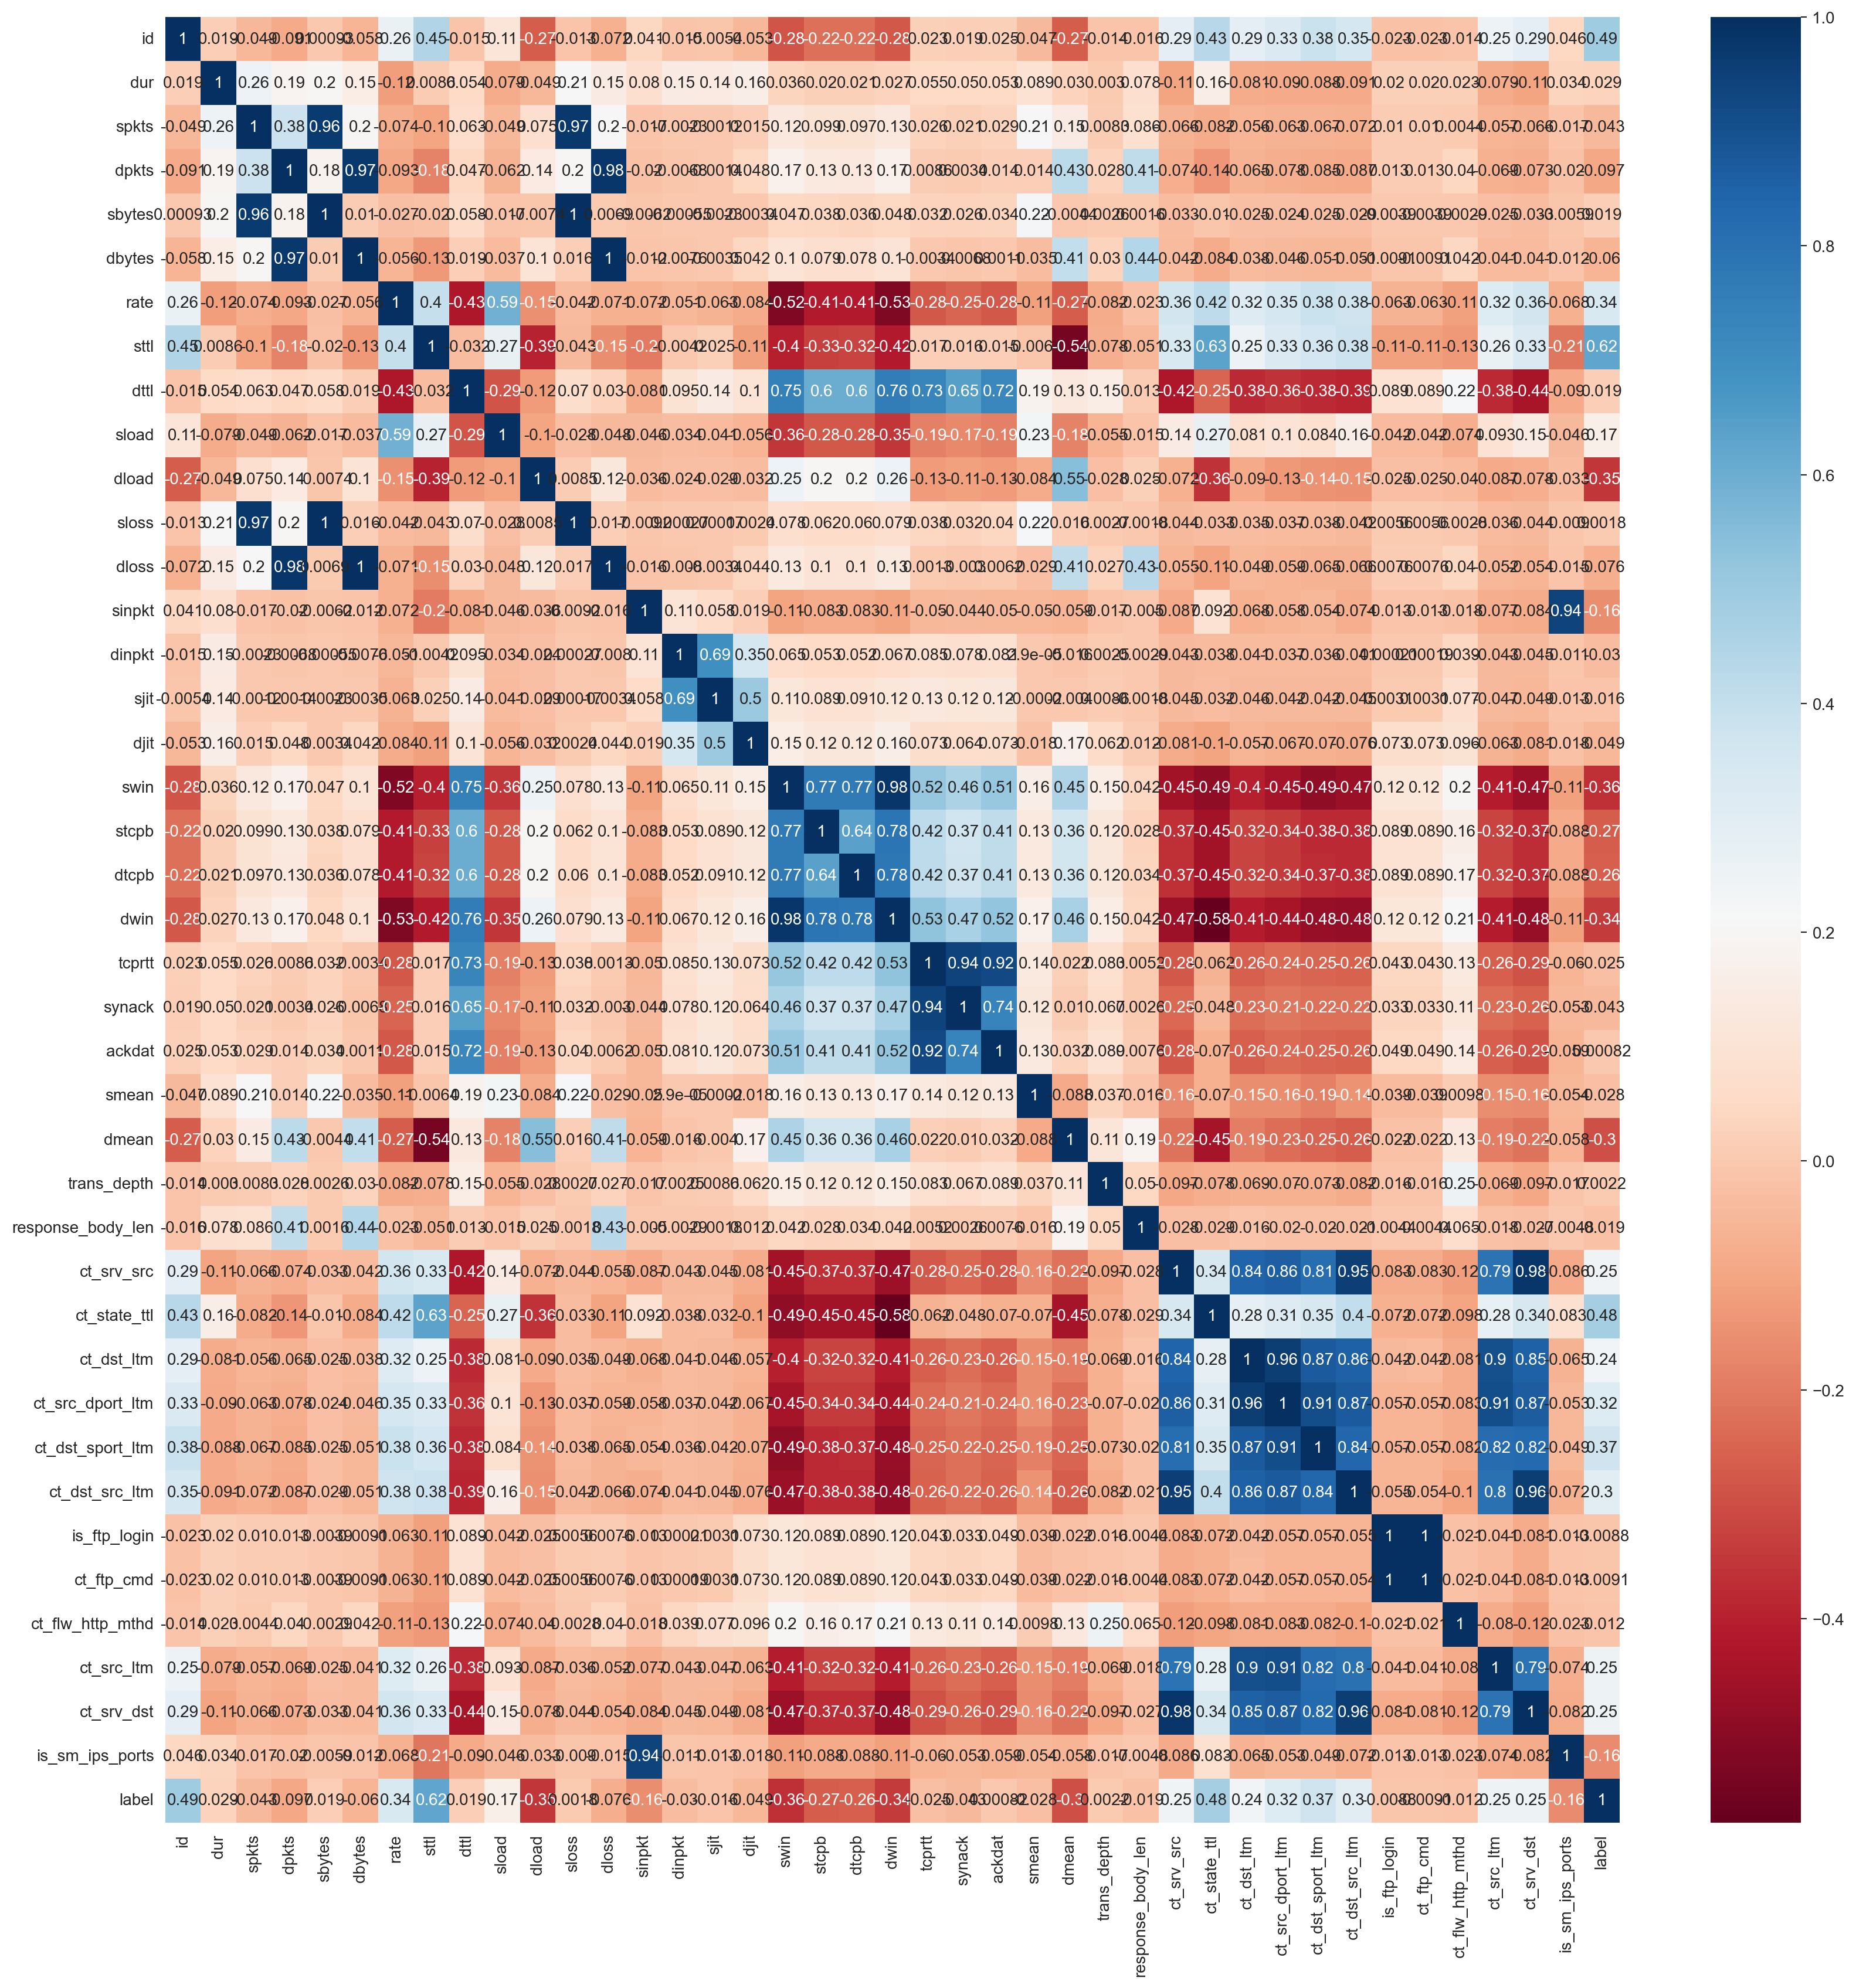

In [30]:

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdBu")

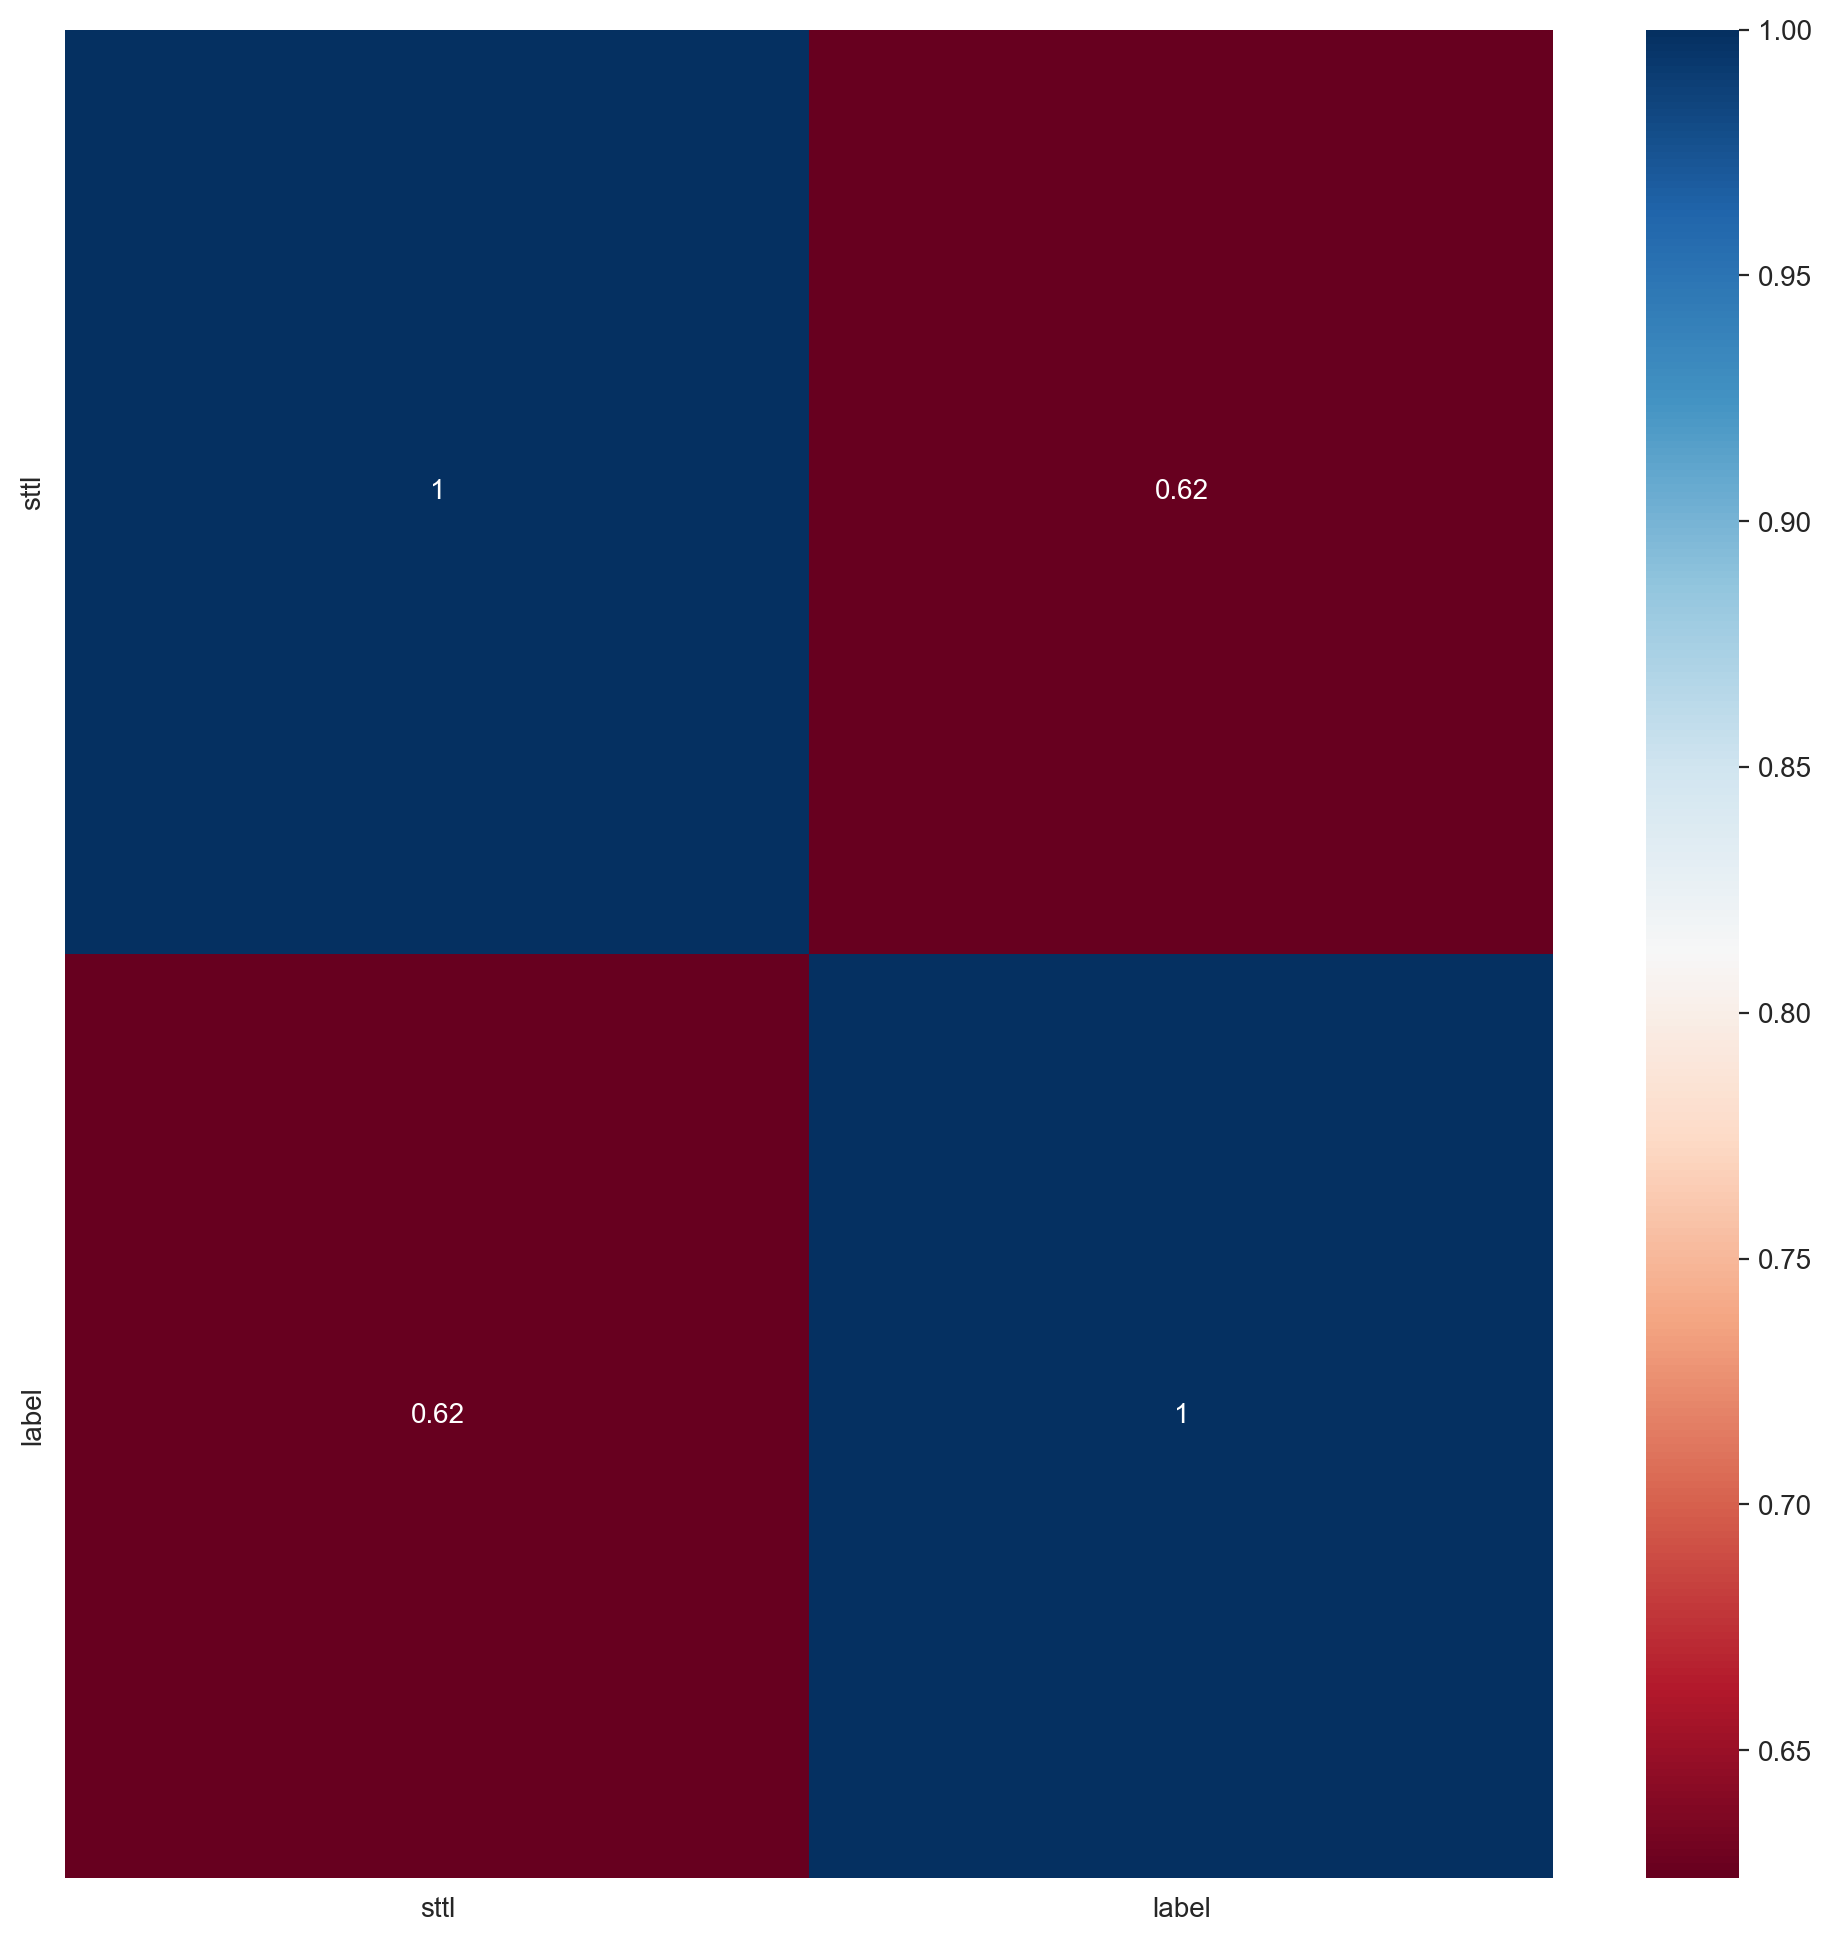

In [31]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["label"]) > 0.5]

# Plot heatmap for top correlated features
plt.figure(figsize=(12,12))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdBu")
plt.show()

Here, the 'sttl' feature has a correlation coefficient of 0.62 with the target variable 'label'. This indicates that as the 'sttl' value increases, the 'label' value also tends to increase. Similarly, as the 'sttl' value decreases, the 'label' value also tends to decrease. This positive correlation suggests that the 'sttl' feature may be a good predictor of the 'label' variable.

The heatmap shows the correlation between the selected features. The color red indicates a positive correlation, while blue indicates a negative correlation. The intensity of the color indicates the strength of the correlation. Darker shades represent stronger correlation, while lighter shades represent weaker correlation. The numbers in the heatmap indicate the correlation coefficients.





In the context of network traffic data, the "Time To Live" (TTL) field in a packet header represents the number of hops that the packet can travel before being discarded. Each hop refers to the passage of a packet through a network node (such as a router or a gateway) that forwards the packet towards its destination.
The TTL value is set by the sender of the packet, and is typically decreased by one by each network node that forwards the packet. If the TTL value reaches zero, the packet is discarded and a message is sent back to the sender. This mechanism helps to prevent packets from being endlessly forwarded in a loop, which can cause network congestion or other issues.
In the context of the UNSW_NB15 dataset, the "still" column with a correlation of 0.62 with the target label could indicate that the number of hops that a packet can travel before being discarded has some predictive power in determining whether a packet is malicious or not. However, it's important to note that correlation does not necessarily imply causation, and further analysis would be required to determine the exact relationship between the TTL value and the target label.

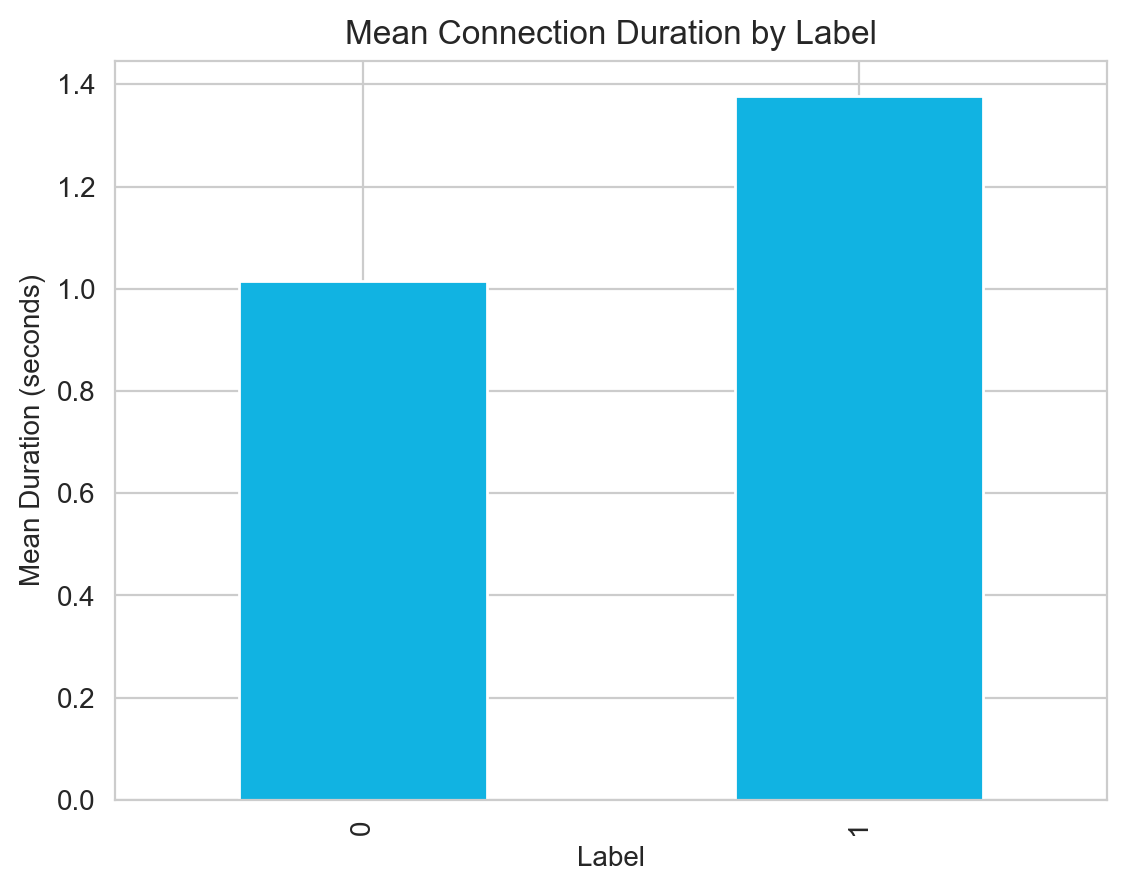

In [32]:
mean_dur = df.groupby('label')['dur'].mean()
mean_dur.plot(kind='bar',color="#11b3e2")
plt.title('Mean Connection Duration by Label')
plt.xlabel('Label')
plt.ylabel('Mean Duration (seconds)')
plt.show()

This information can be useful in cybersecurity because abnormal or malicious network traffic may have a significantly different connection duration compared to normal traffic. For example, a network connection that lasts for an unusually long time may indicate the presence of malware, a data exfiltration attempt, or a persistent threat actor.

By visualizing the mean connection duration for each label, the code can help to identify patterns or anomalies in the network traffic. A bar chart is used to show the mean duration for each label, with each label represented by a different color. The x-axis shows the labels, and the y-axis shows the mean duration in seconds. This visualization can help to quickly identify any labels that have an unusually long or short mean duration, which could be further investigated to determine if any suspicious activity is present.

In [33]:
df=pd.read_csv("pfe_dataset.csv")

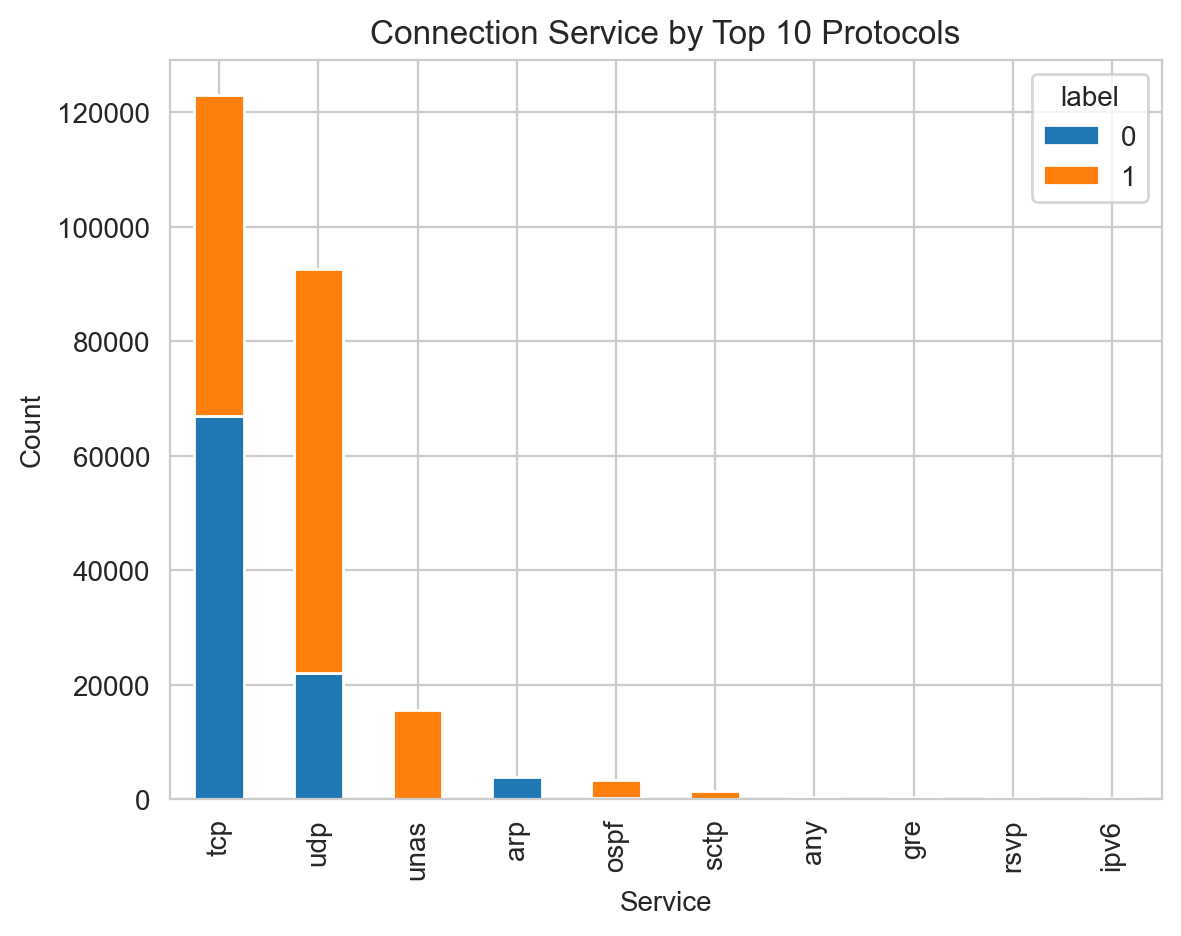

In [34]:
top_protocols = df['proto'].value_counts().head(10).index.tolist()
df_top_protocols = df.loc[df['proto'].isin(top_protocols)]
service_label_count = df_top_protocols.groupby(['proto', 'label']).size().unstack()
service_label_count = service_label_count.loc[service_label_count.sum(axis=1).sort_values(ascending=False).index]
service_label_count.plot(kind='bar', stacked=True)
plt.title('Connection Service by Top 10 Protocols')
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()


This code is creating a stacked bar chart that shows the count of connections for each of the top 10 protocols grouped by their label. The protocols tcp, udp, unas, arp, and ospf are the highest because they are commonly used in network communication. TCP and UDP are the most commonly used transport layer protocols for communication between applications. ARP is a protocol used for mapping a network address (such as an IP address) to a physical address (such as a MAC address) on a local network. OSPF is a routing protocol used in large enterprise networks.

Regarding the 'ump' column, I assume you mean the 'ump' protocol. This protocol is not actually a well-known protocol and may be specific to the dataset being used in this code. It is possible that it is a proprietary or non-standard protocol used by a particular application or system. Its higher count in the chart may indicate that it was more commonly used in the dataset than other less common protocols.

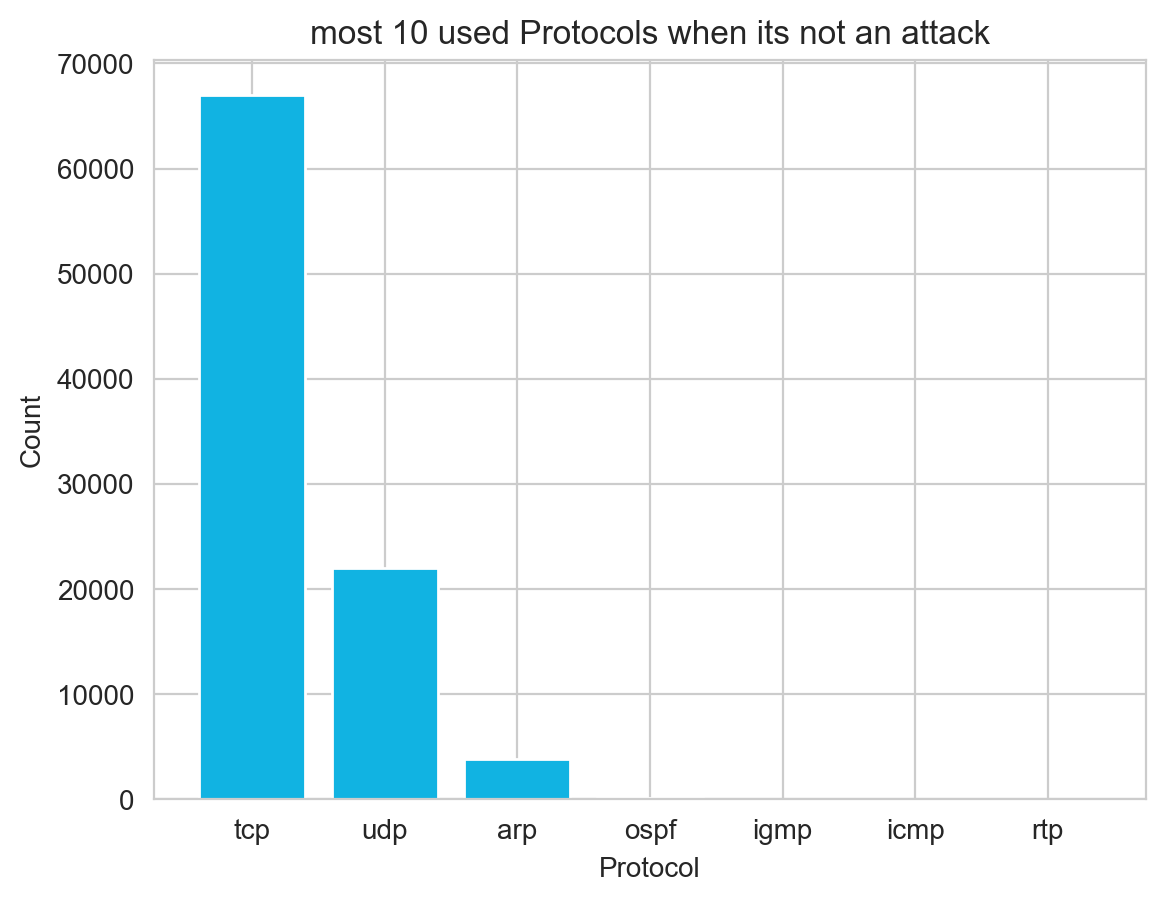

In [35]:
df_label_0 = df.loc[df['label'] == 0]
top_protocols = df_label_0['proto'].value_counts().head(10).sort_values(ascending=False).index.tolist()
df_top_protocols = df_label_0.loc[df_label_0['proto'].isin(top_protocols)]
protocol_count = df_top_protocols['proto'].value_counts()
plt.bar(protocol_count.index, protocol_count.values,color="#11b3e2")
plt.title('most 10 used Protocols when its not an attack')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()



The code above generates a bar chart showing the top 10 most commonly used network protocols in normal network traffic, i.e., when there is no attack present. The chart is based on a subset of the dataset containing only instances where the label is 0, which means there is no attack.

The x-axis of the chart shows the names of the protocols, and the y-axis shows the count of instances in which each protocol was used. The chart is color-coded with a blue color (#11b3e2), which helps to differentiate the bars from one another.

From the chart, we can see that the most commonly used protocol is TCP, followed by UDP and ICMP. Other protocols such as IGMP, IP, and IPv6 are used much less frequently. This information can be useful for network administrators and security professionals who want to monitor network traffic and detect anomalies or potential threats.

TCP and UDP are the most commonly used protocols in computer networks. TCP provides a reliable, connection-oriented communication service, while UDP provides an unreliable, connectionless communication service.

In the context of the given code, it shows that when there is no attack present in the network, TCP and UDP are the most frequently used protocols. This can be because TCP is widely used for applications such as web browsing, email, and file transfer, while UDP is commonly used for real-time applications such as online gaming and video streaming.

Furthermore, the fact that TCP is followed by UDP in terms of usage can be attributed to the wide range of applications and services that use TCP, which often results in higher network traffic. Additionally, some applications, such as online gaming and voice over IP (VoIP), use UDP instead of TCP due to its lower overhead and faster speed.

The Address Resolution Protocol (ARP) is a network protocol used to resolve the physical address (MAC address) associated with an IP address. In other words, it is used to map an IP address to a MAC address, which is necessary for communication between devices on a network.

In the context of the code you provided, when there is no attack, it is likely that the network is functioning normally, and devices are communicating with each other, which requires the use of ARP. Therefore, ARP is one of the most used protocols in this scenario.


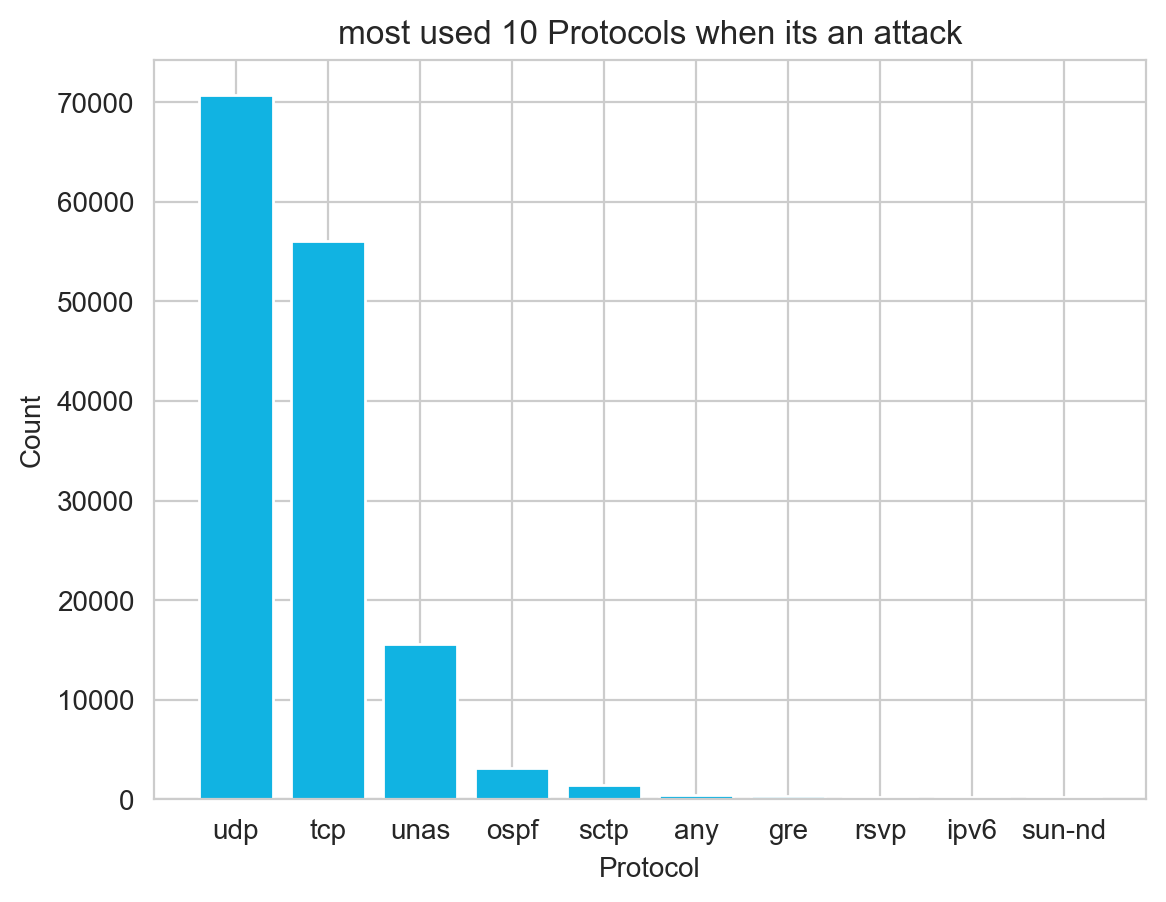

In [36]:
df_label_0 = df.loc[df['label'] == 1]
top_protocols = df_label_0['proto'].value_counts().head(10).sort_values(ascending=False).index.tolist()
df_top_protocols = df_label_0.loc[df_label_0['proto'].isin(top_protocols)]
protocol_count = df_top_protocols['proto'].value_counts()
plt.bar(protocol_count.index, protocol_count.values,color="#11b3e2")
plt.title('most used 10 Protocols when its an attack')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()


The resulting chart shows the frequency of the top 10 protocols used during attacks in the dataset. This information can be useful in identifying common attack methods and can help in developing appropriate countermeasures. The chart shows that TCP is the most frequently used protocol during attacks, followed by UDP and ICMP.

TCP is one of the most commonly used protocols for communication over the internet. This makes it a prime target for attackers who are looking to exploit vulnerabilities in the protocol to launch attacks. In addition, TCP is a reliable protocol that guarantees delivery of packets, making it an attractive option for attackers who want to ensure their malicious packets are successfully delivered to the target. Furthermore, TCP allows for the establishment of connections between hosts, which can be exploited in various ways to launch attacks such as TCP SYN floods, TCP session hijacking, and TCP injection attacks. All these factors make TCP the most frequently used protocol during attacks.

UDP is also frequently used in attacks because it is connectionless and lightweight, making it suitable for performing flooding and DoS attacks. Unas (ICMP Unreachable) and OSPF are also commonly used in attacks as they can be used to scan networks and gather information about potential targets. Additionally, OSPF attacks can be used to manipulate routing tables and redirect traffic to attacker-controlled destinations.









>
When it comes to the most used protocols during attacks, TCP is the most frequently used protocol. This is likely because TCP is a reliable, connection-oriented protocol that guarantees packet delivery, making it an attractive choice for attackers looking to transfer large amounts of data. Additionally, TCP is the primary protocol used for web traffic, and many attacks target web applications, which could explain its high usage during attacks.

UDP, OSPF, and UNAS are also among the most used protocols during attacks. UDP is a faster, connectionless protocol that does not guarantee packet delivery, making it ideal for sending small amounts of data quickly. This makes it a popular choice for some types of attacks, such as distributed denial-of-service (DDoS) attacks, where attackers try to flood a network or server with a large volume of traffic.

OSPF is an interior gateway protocol used by routers to exchange routing information, and UNAS is a proprietary protocol used by some network devices. It is possible that attackers are targeting these protocols as a way to disrupt network routing or gain access to sensitive network devices.

When it comes to the most used protocols during non-attack traffic, ARP is one of the most commonly used protocols. ARP is used to map a network address (such as an IP address) to a physical address (such as a MAC address). This is a critical function of network communication, and ARP is used extensively in local area networks (LANs) to facilitate communication between devices. Therefore, it makes sense that ARP is a frequently used protocol during normal network traffic.

Finally, the low usage of GRE, IPv6, SUN, and ND during attacks could be because these protocols are not commonly used or widely supported. For example, GRE (Generic Routing Encapsulation) is a protocol used to encapsulate packets in a way that allows them to be transmitted over non-native networks, but it is not widely supported by network devices. Similarly, IPv6 is a newer version of the Internet Protocol that is not yet widely adopted, and SUN (Sun ND) and ND (Neighbor Discovery Protocol) are proprietary protocols used by specific network devices. Therefore, it is less likely that attackers would use these protocols during attacks.





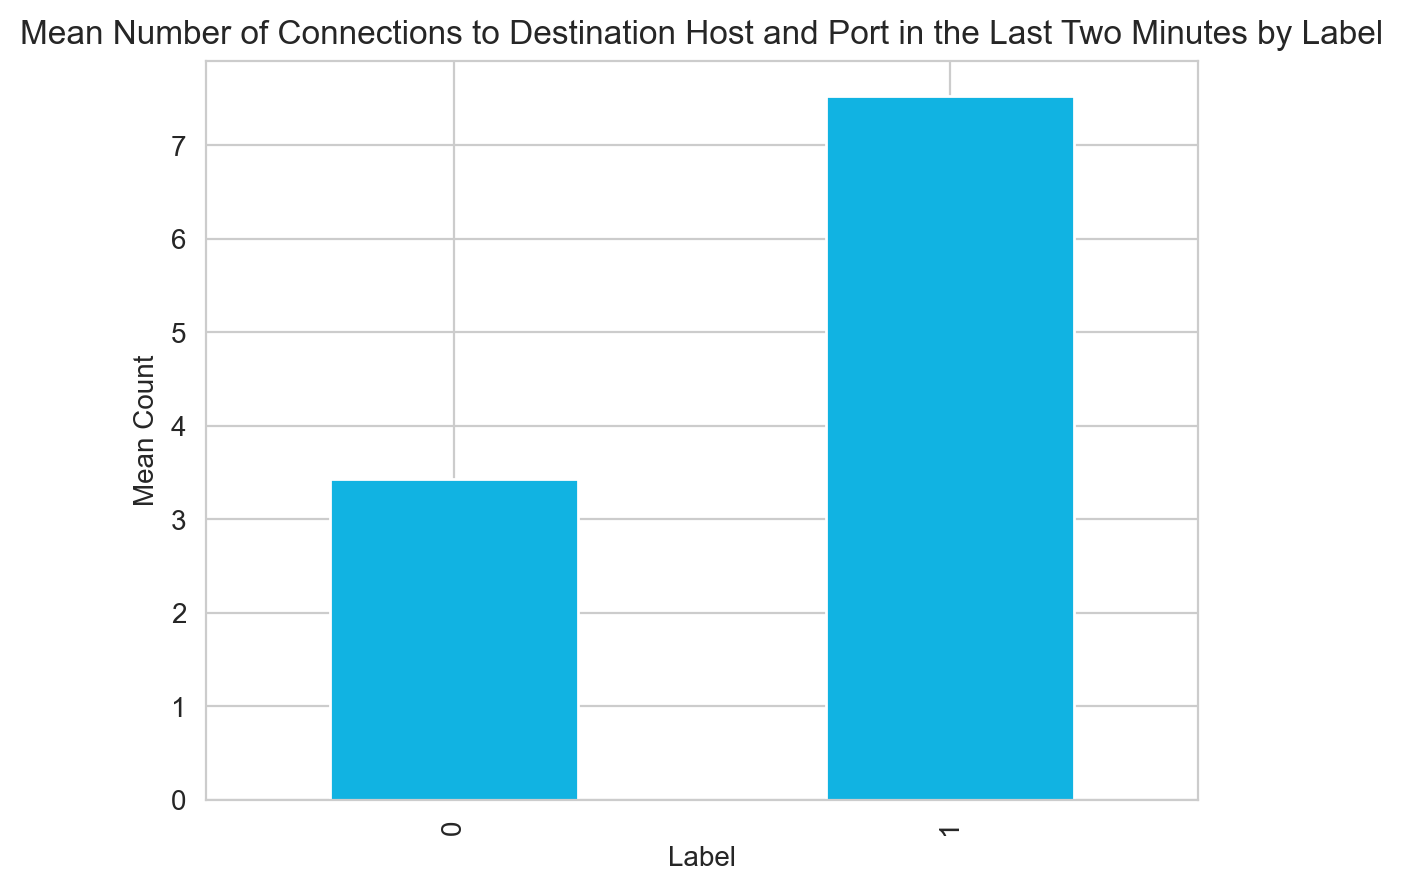

In [37]:
mean_ct_dst_ltm = df.groupby('label')['ct_dst_ltm'].mean()
mean_ct_dst_ltm.plot(kind='bar',color="#11b3e2")
plt.title('Mean Number of Connections to Destination Host and Port in the Last Two Minutes by Label')
plt.xlabel('Label')
plt.ylabel('Mean Count')
plt.show()

This code calculates the mean number of connections to the destination host and port in the last two minutes for each label (0 or 1) and plots the result in a bar graph.

In network security, analyzing the number of connections to a particular host or port over time can help detect suspicious activity. Attackers often make repeated attempts to connect to a target host or port to gain unauthorized access or perform other malicious actions.

The ct_dst_ltm feature in the dataset represents the number of connections to the same destination host and port in the last two minutes. By calculating the mean value of this feature for each label, we can compare the average number of connections to the destination host and port in the last two minutes between normal and attack traffic.

The resulting bar graph shows that the mean number of connections to the destination host and port in the last two minutes is much higher for attack traffic (label 1) than for normal traffic (label 0). This suggests that attackers are more likely to make repeated attempts to connect to the same destination host and port than legitimate users.

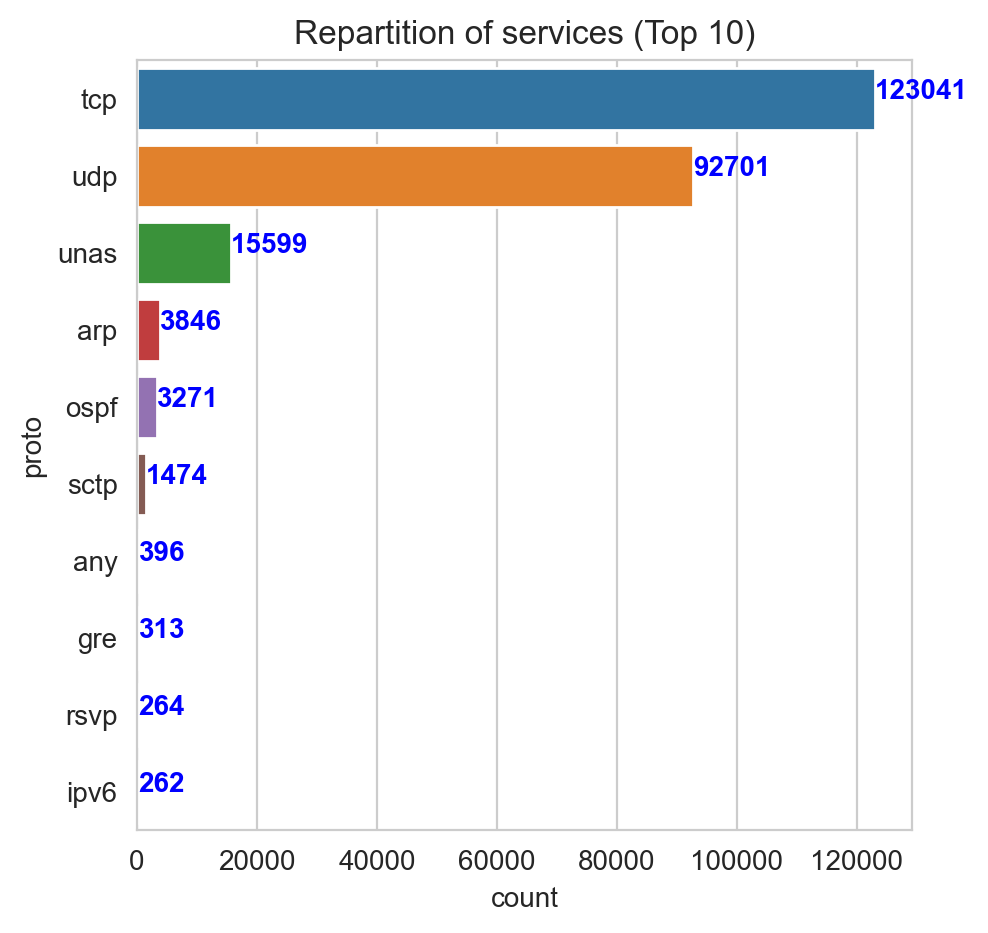

In [38]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
top_proto = df['proto'].value_counts().head(10)
cplot = sns.countplot(y="proto", data=df, order=top_proto.index)
for i, v in enumerate(top_proto):
    cplot.text(v + 1, i, str(v), color='blue', fontweight='bold')
    if v == 0 or v == 1:
        cplot.text(v + 1, i-0.25, str(df[df['proto']==top_proto.index[i]]['label'].unique()), 
                    color='red', fontweight='bold')

cplot.set_title("Repartition of services (Top 10)")
plt.show()


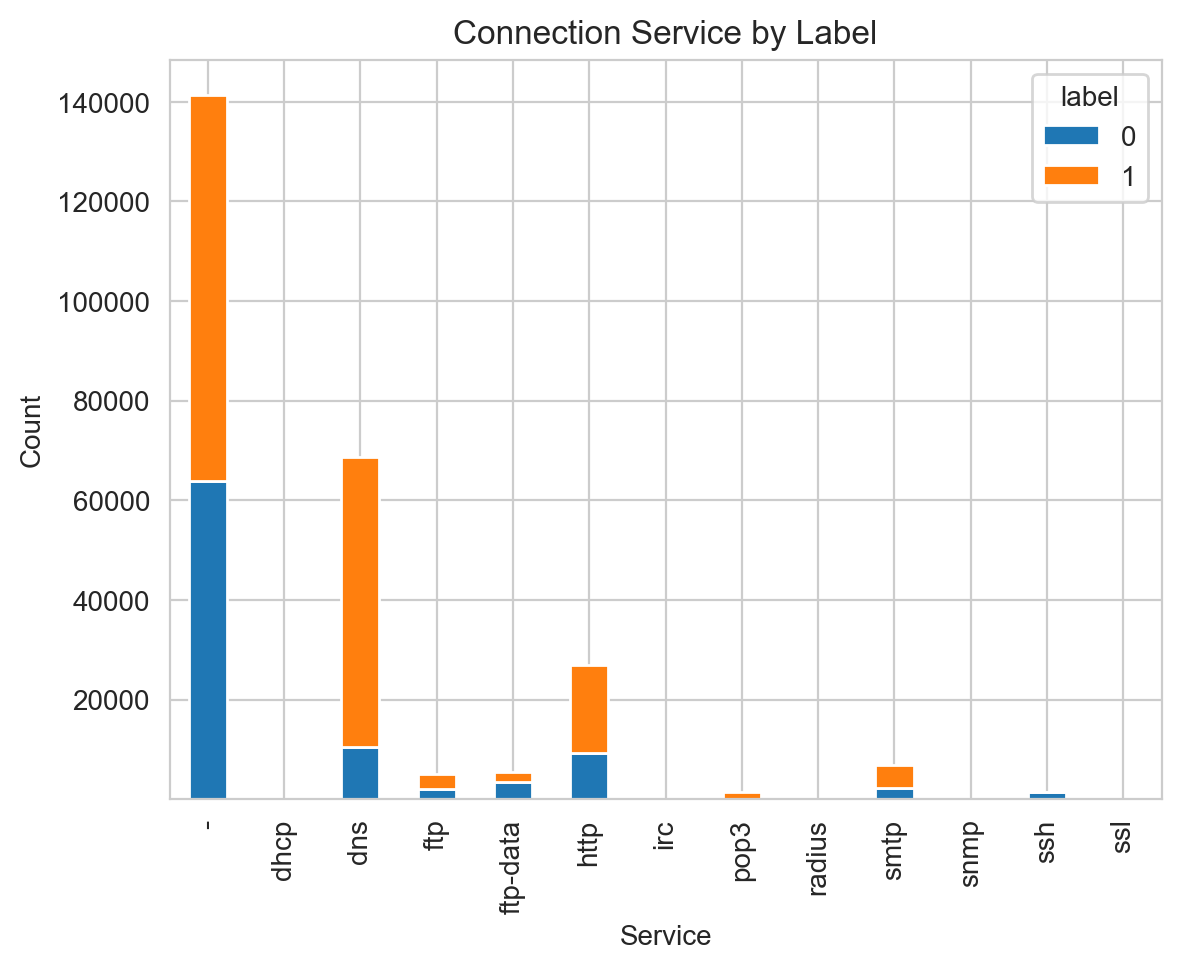

In [39]:
service_label_count = df.groupby(['service', 'label']).size().unstack()
service_label_count.plot(kind='bar', stacked=True)
plt.title('Connection Service by Label')
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()

This code calculates and visualizes the count of connection services based on the label (attack or not attack). The first line groups the dataframe by the 'service' and 'label' columns, and calculates the count of each unique combination. The unstack() method then transforms the resulting dataframe to have the 'label' values as columns and 'service' values as rows.

The second line plots a stacked bar chart where each bar represents a connection service, and the height of each segment within the bar represents the count of that service for each label. This provides a visual comparison of the distribution of connection services between attacks and non-attacks.

Overall, this code is useful for identifying which connection services are more commonly associated with attacks and non-attacks, which can inform security measures and threat detection strategies.

>
the bar graph shows the distribution of connection services by label, meaning it shows how the types of services used in the connections are distributed between normal connections and attacks. The graph is stacked, meaning that for each type of service, the bars are divided into two parts, one for normal connections and one for attacks. The height of each part represents the number of connections that use that service type for the corresponding label.

By looking at the graph, we can see that some services are more commonly used in attacks than in normal connections, such as http, domain, and ssl. On the other hand, some services are more commonly used in normal connections, such as ssh, telnet, and ftp-data.

Overall, this graph provides insights into the types of services that are more commonly used in attacks and can help security professionals to better understand the patterns of attacks and develop strategies to prevent and mitigate them.
>
During an attack, the attacker's goal is often to disrupt the normal flow of traffic or to exfiltrate sensitive data. This is why we see certain services being targeted more frequently during attacks.

DNS, HTTP, and SMTP are commonly used services in communication and are therefore popular targets for attackers to disrupt communication. DNS is targeted because it translates domain names to IP addresses, and if disrupted, it can cause issues with accessing websites or other internet-based services. HTTP is used for web traffic, and it can be disrupted to cause websites to become unavailable. SMTP is used for email traffic, and it can be targeted to disrupt email communication.

On the other hand, SSH, SSL, and IRC are less frequently targeted during attacks because they are typically used for secure communication. SSH (Secure Shell) is a protocol for secure remote login and other secure network services over an insecure network. SSL (Secure Sockets Layer) is a protocol for establishing secure communication links between networked computers. IRC (Internet Relay Chat) is a protocol for real-time chat and messaging over the internet. Since these services are designed to be secure, it is more difficult for attackers to disrupt their normal operation or exfiltrate data through them.

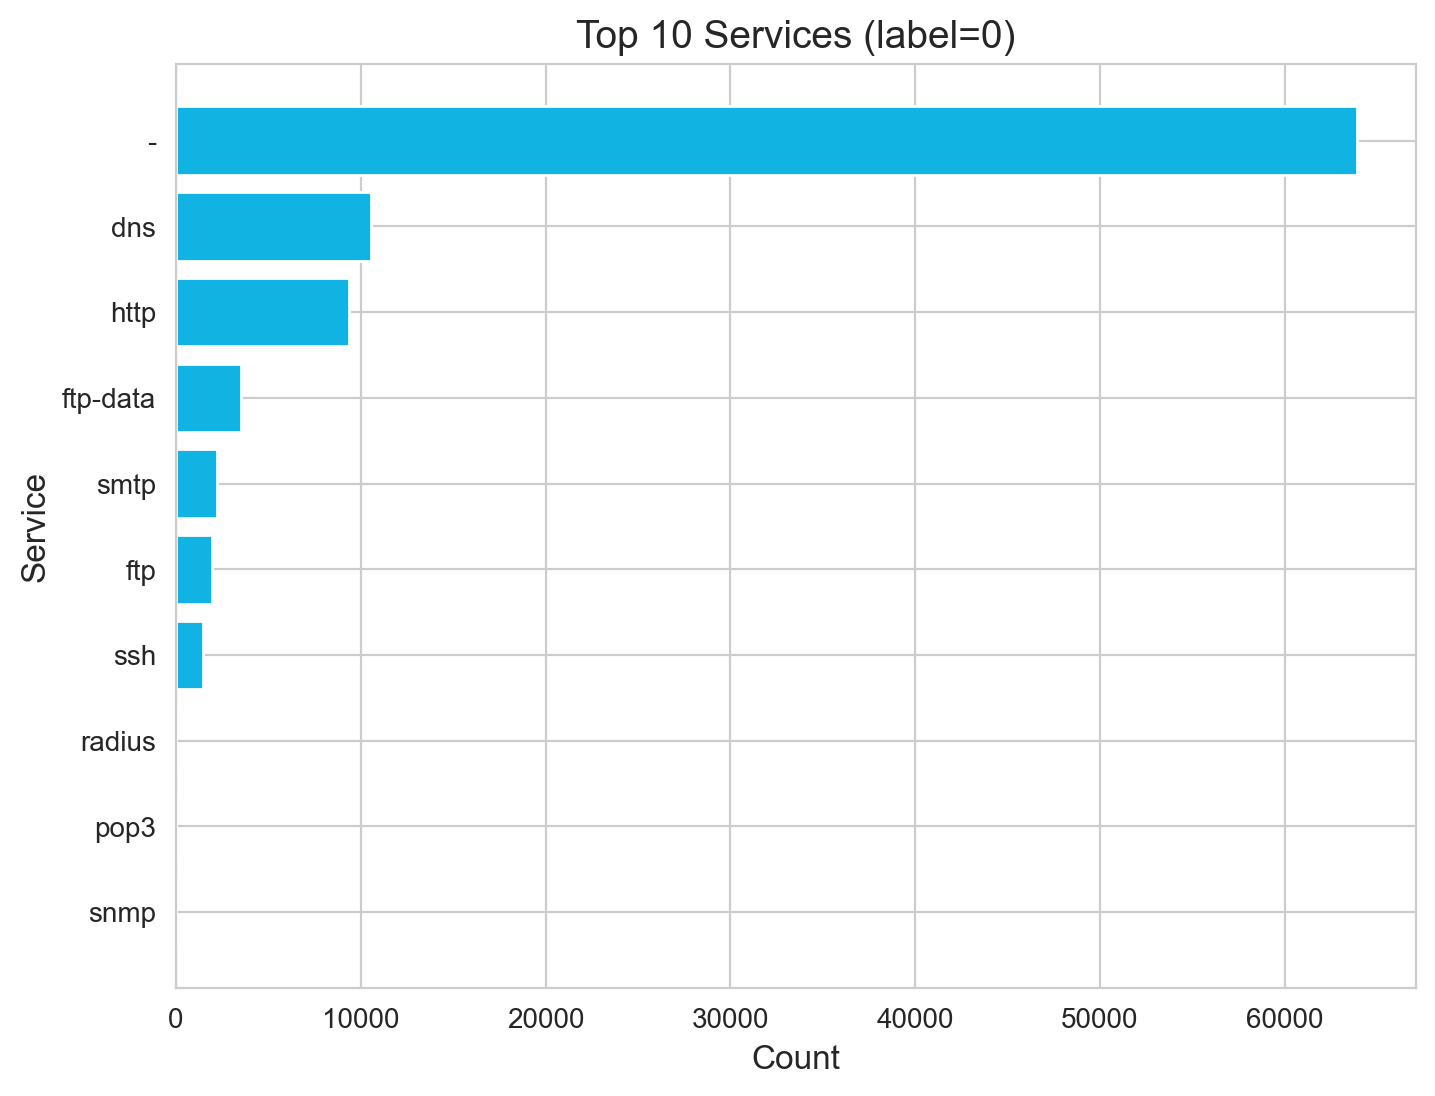

In [40]:
top_services_label0 = df[df['label'] == 0]['service'].value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.barh(top_services_label0.index, top_services_label0.values,color="#11b3e2")
plt.title('Top 10 Services (label=0)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Service', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

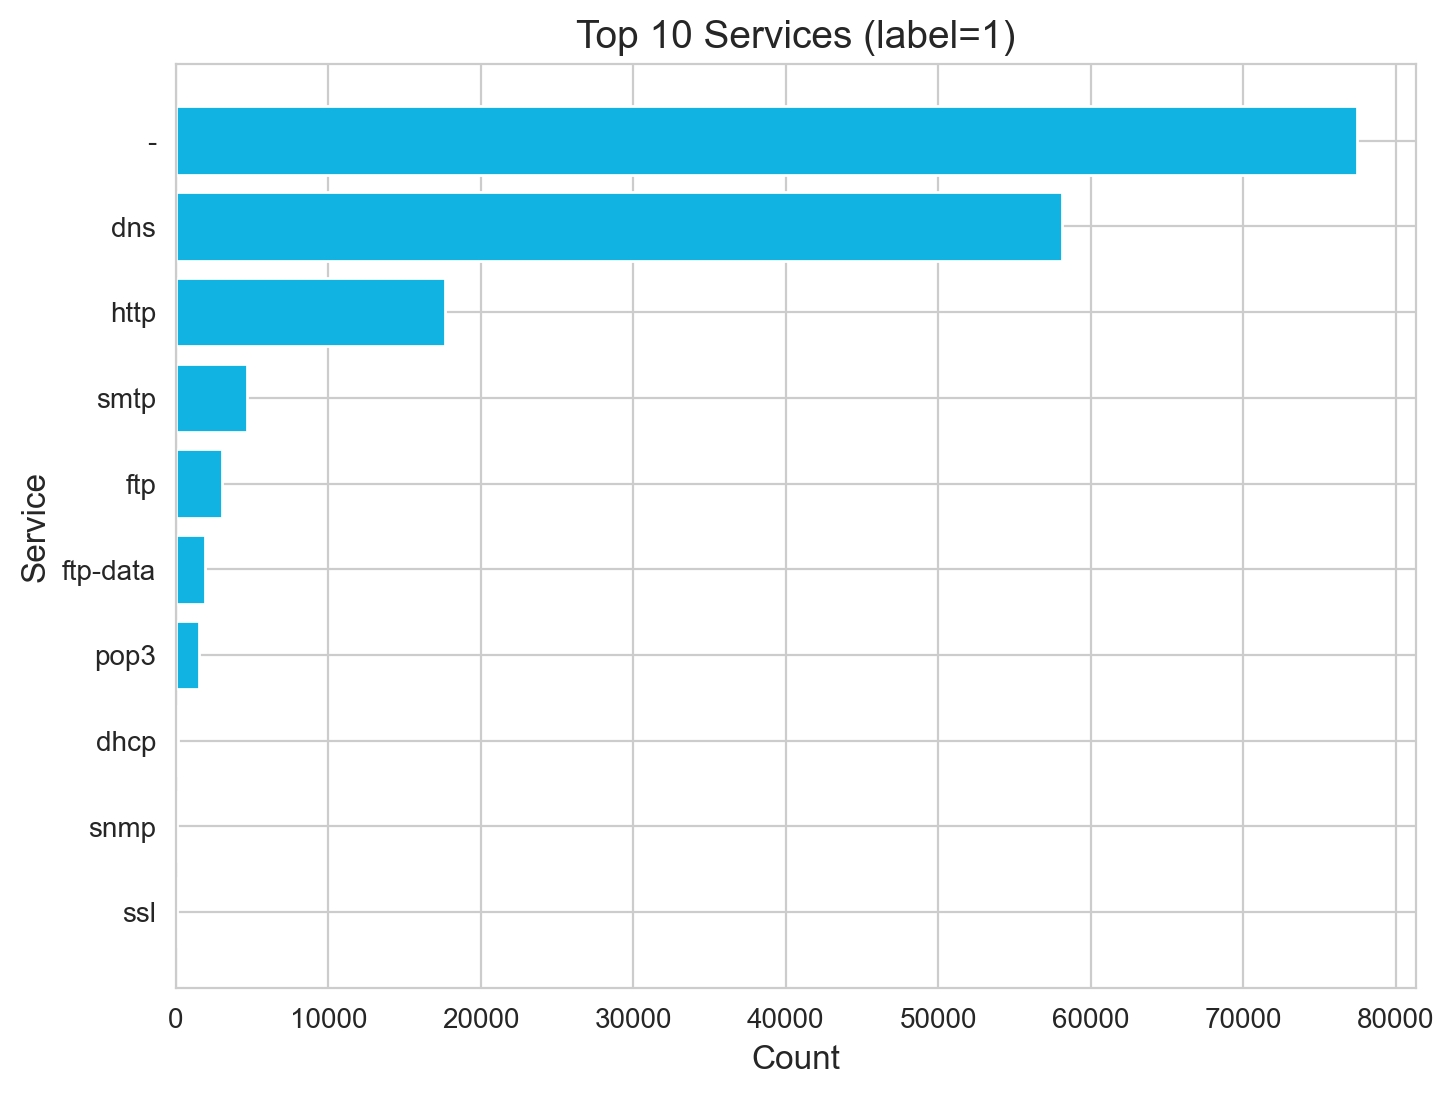

In [41]:
top_services_label1 = df[df['label'] == 1]['service'].value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.barh(top_services_label1.index, top_services_label1.values,color="#11b3e2")
plt.title('Top 10 Services (label=1)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Service', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

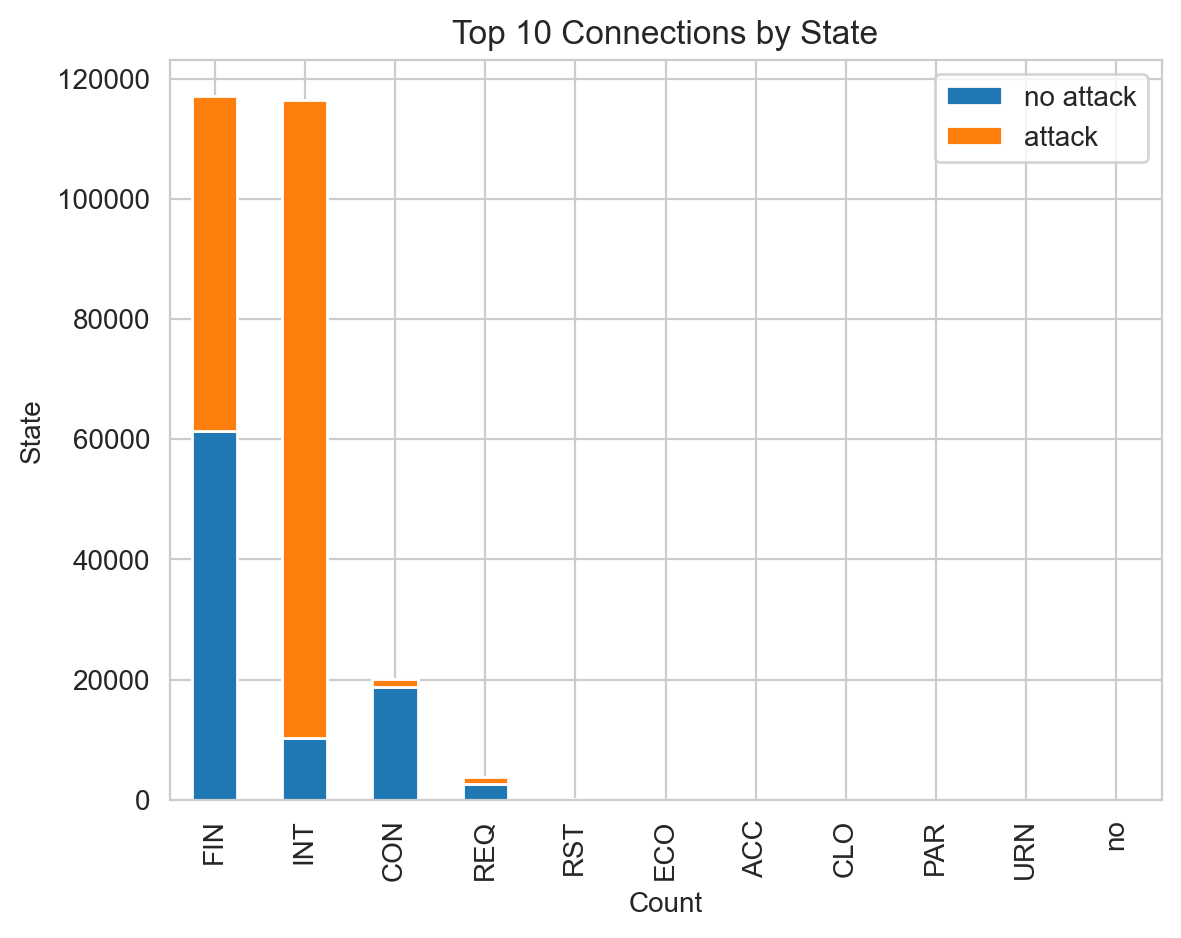

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
top_states_0 = df.loc[df['label'] == 0, 'state'].value_counts().head(10).sort_values(ascending=False)
top_states_1 = df.loc[df['label'] == 1, 'state'].value_counts().head(10).sort_values(ascending=False)
top_states = pd.concat([top_states_0, top_states_1], axis=1, sort=True).fillna(0)
top_states.columns = ['label 0', 'label 1']
top_states['count'] = top_states.sum(axis=1)
top_states = top_states.sort_values('count', ascending=False).drop('count', axis=1)
top_states.plot(kind='bar', stacked=True)
plt.title('Top 10 Connections by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.legend(labels=['no attack', 'attack'])
plt.show()


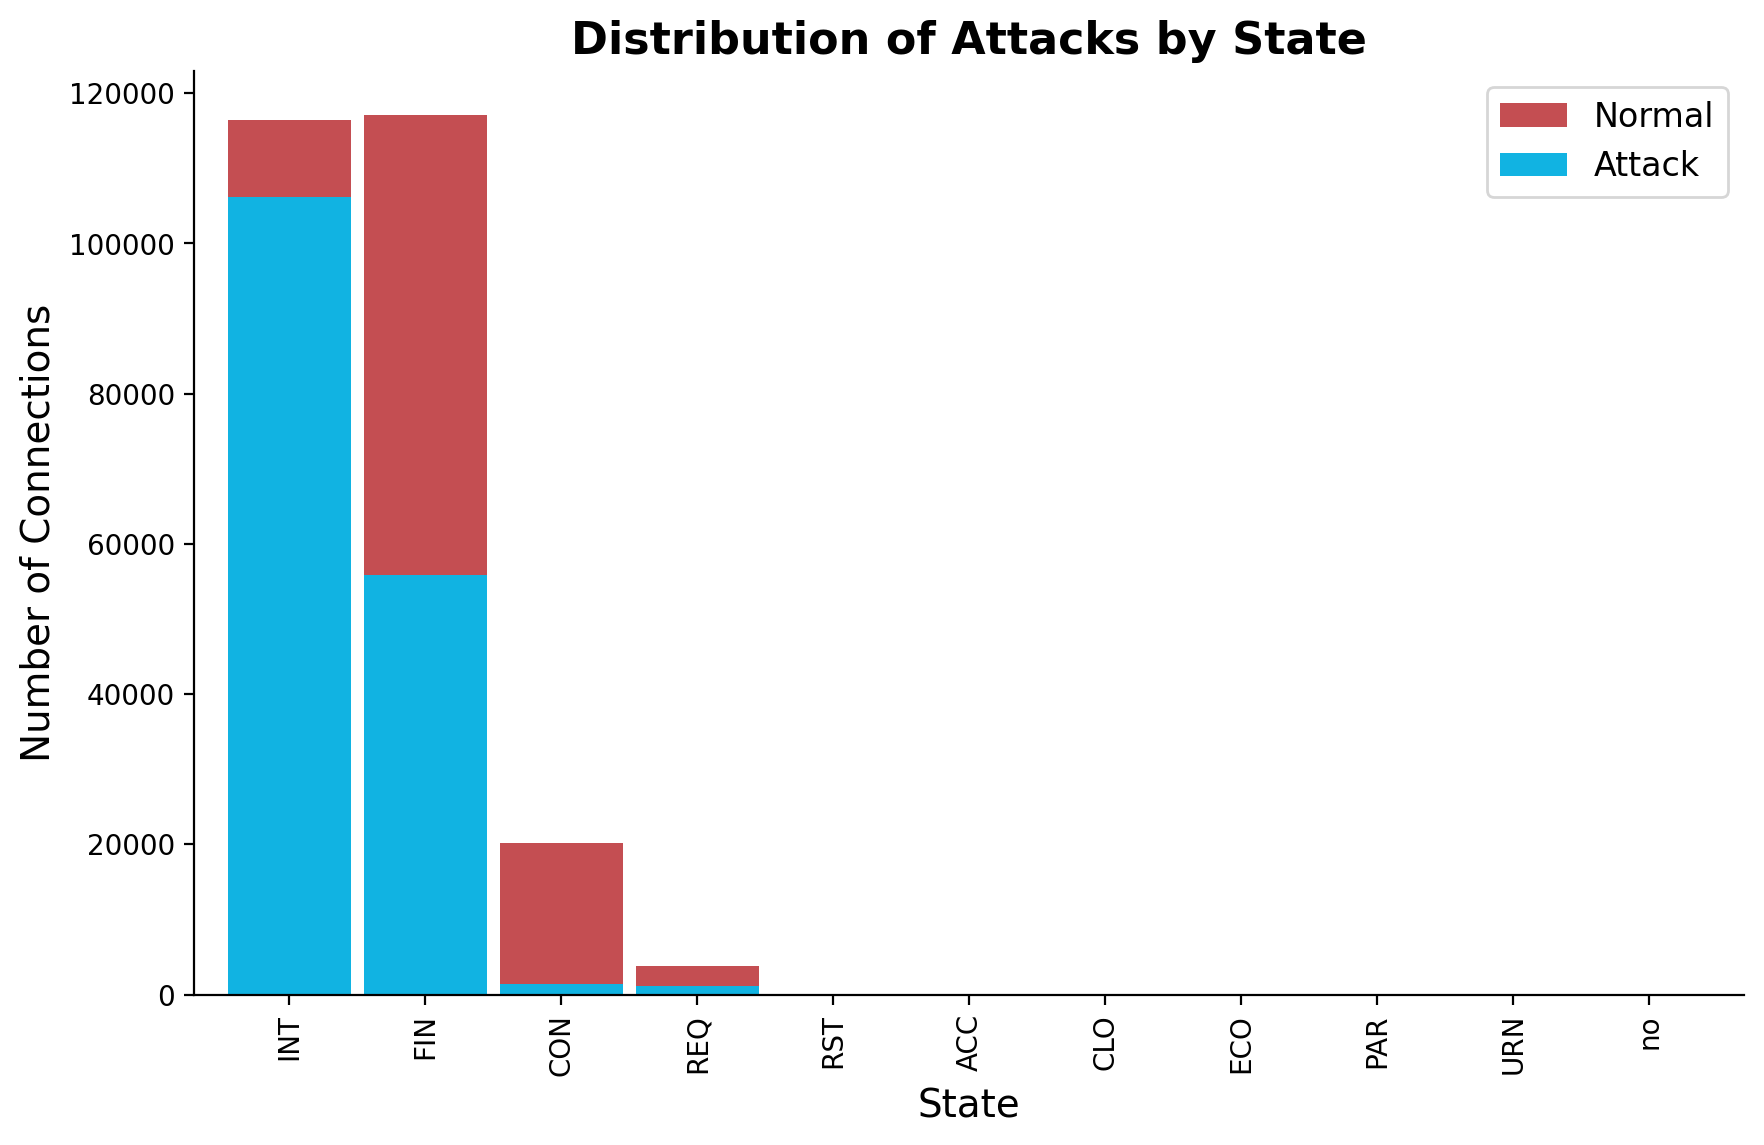

In [43]:
plt.style.use('default')
df.replace(" ", float("NaN"), inplace=True)
df.dropna(inplace=True)
df["attack_type"] = df["attack_cat"].apply(lambda x: "Normal" if x == "Normal" else "Attack")
grouped = df.groupby(["state", "attack_type"])["id"].count().unstack().sort_values("Attack", ascending=False)
ax = grouped.plot(kind="bar", stacked=True, figsize=(10,6), color=["#11b3e2", "#C44E52"], width=0.9)
ax.set_title("Distribution of Attacks by State", fontsize=16, fontweight="bold")
ax.set_xlabel("State", fontsize=14)
ax.set_ylabel("Number of Connections", fontsize=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="", fontsize=12)

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.show() 

stacked bar chart showing the top 10 connection states for both attack and non-attack traffic.

First, it filters the DataFrame to create two separate DataFrames: one for rows where the 'label' column is 0 (no attack) and another for rows where 'label' is 1 (attack). It then uses the 'value_counts()' function to count the occurrences of each state in the 'state' column, for each of the two DataFrames. The top 10 states for each DataFrame are then concatenated into a single DataFrame using the 'concat()' function, and any missing values are filled with 0s using 'fillna()'. The resulting DataFrame has two columns, one for each label value, and a third column showing the total count for each state across both labels. It is then sorted by the total count in descending order and the third column is dropped.

The stacked bar chart is then created using the 'plot()' function with the 'kind' parameter set to 'bar' and the 'stacked' parameter set to 'True'. This creates a chart with bars for each state, split into two parts showing the count for each label. The chart has a title, x-axis label, y-axis label, and a legend showing which label each color corresponds to.

Overall, this chart can help identify which states are most commonly associated with attacks, and which are more commonly seen in non-attack traffic.



>
FIN: The connection is being closed and the sender is finished sending data.

INT: The sender has requested that the connection be closed and is no longer transmitting data.

CON: The connection is established and data is being transmitted in both directions.

REQ: The sender has requested that a connection be established.

In general, the 'state' column is used to indicate the current state of a network connection. In the case of attacks, the values of this column can provide information about the type and behavior of the attacker.

Looking at the graph, we can see that the four most common values in the 'state' column for both label 0 and label 1 are FIN, INT, CON, and REQ. This is likely because these are the most common states for network connections in general, regardless of whether or not an attack is occurring.

However, it's interesting to note that INT and FIN are the most common values in the 'state' column for label 1, which indicates that an attack is occurring. This could be because attackers are more likely to use these values in order to disrupt or terminate network connections. The FIN flag, for example, can be used to close a connection abruptly, while the INT flag can be used to disrupt communication between two hosts.

Overall, the 'state' column can provide valuable information about the behavior of network connections, both during normal operation and during attacks. By analyzing the distribution of values in this column, we can gain insights into the types of attacks that are occurring and the methods that attackers are using to disrupt network communication.

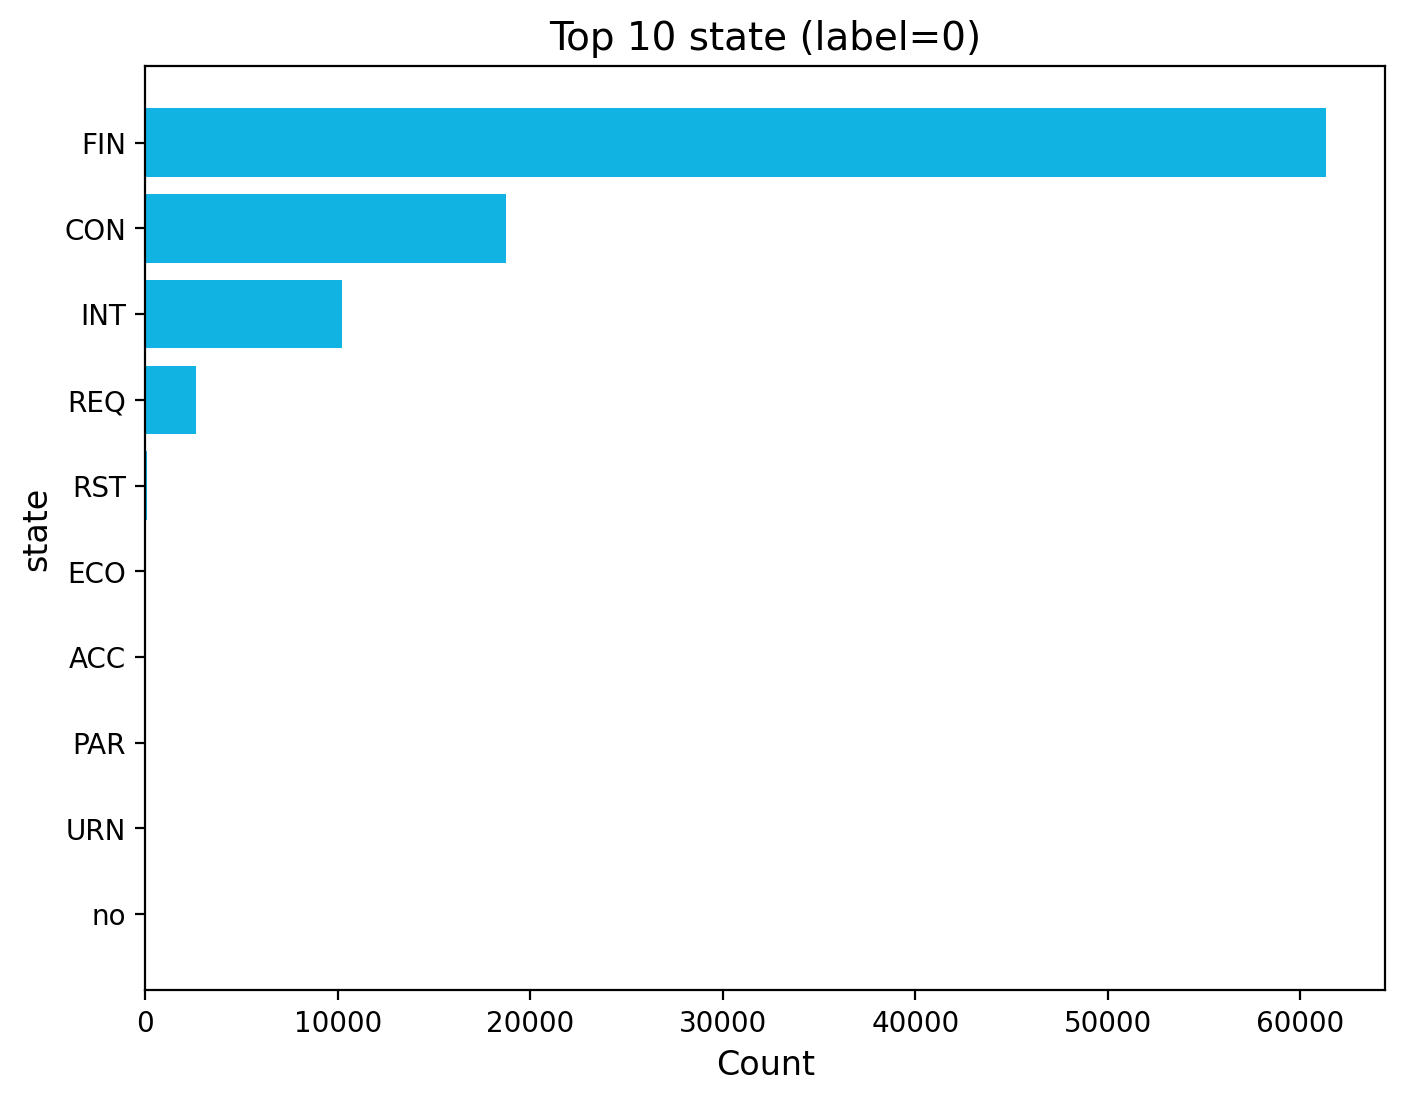

In [44]:
top_services_label0 = df[df['label'] == 0]['state'].value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.barh(top_services_label0.index, top_services_label0.values,color="#11b3e2" )
plt.title('Top 10 state (label=0)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('state', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

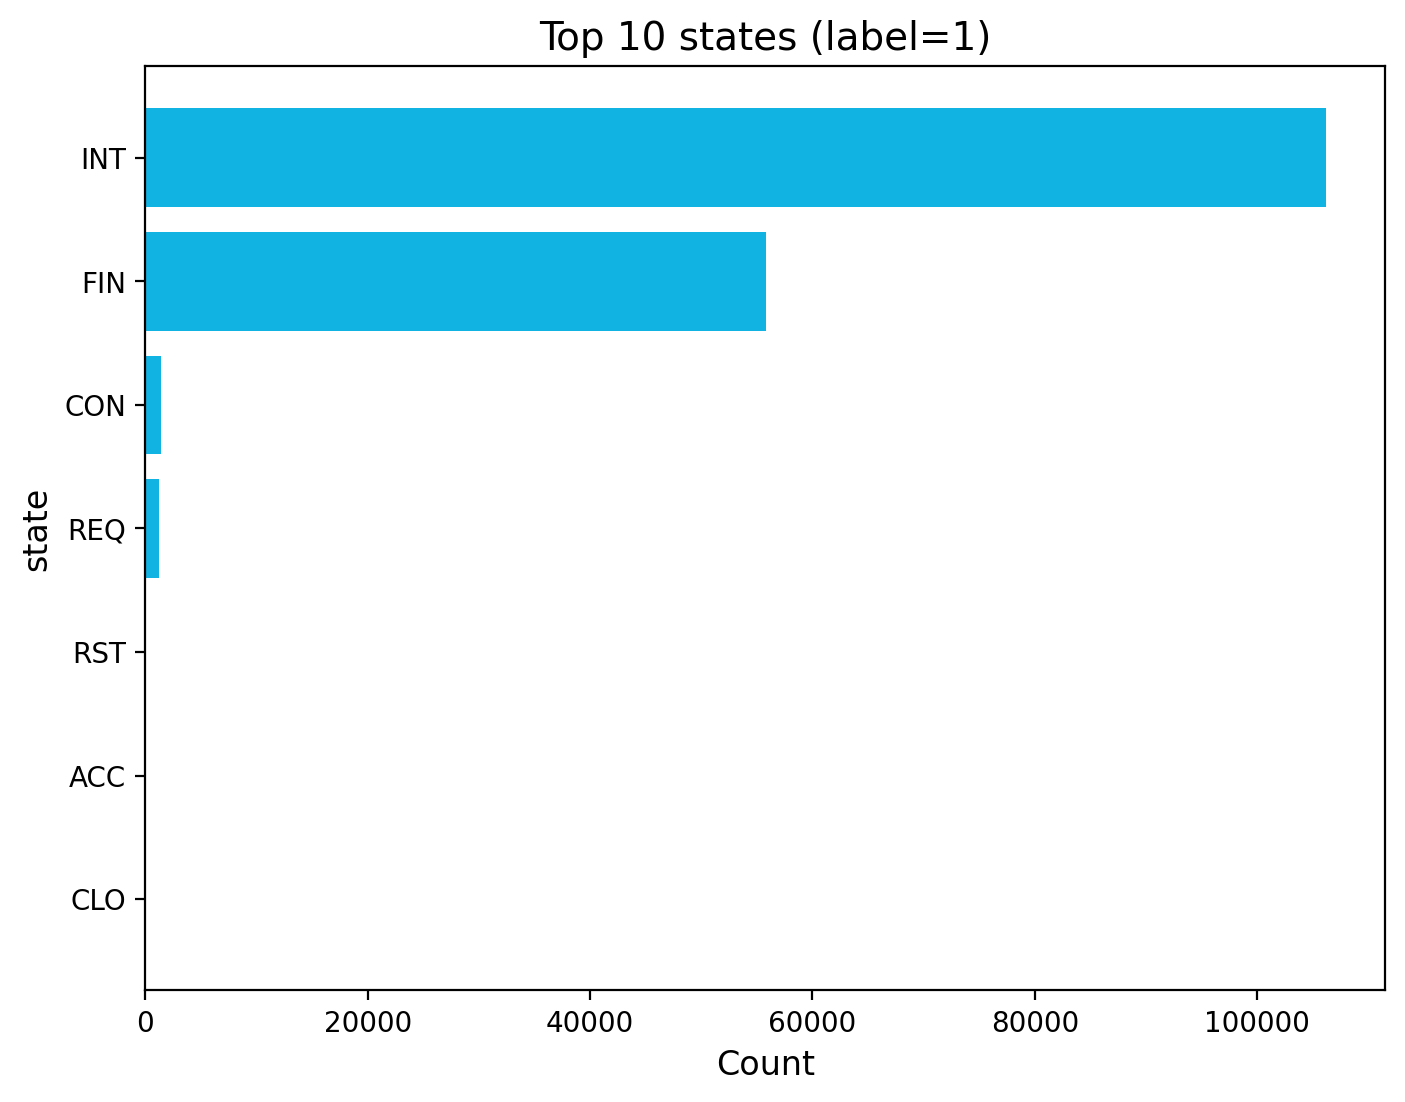

In [45]:
top_services_label1 = df[df['label'] == 1]['state'].value_counts().head(10).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(top_services_label1.index, top_services_label1.values,color="#11b3e2")
plt.title('Top 10 states (label=1)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('state', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

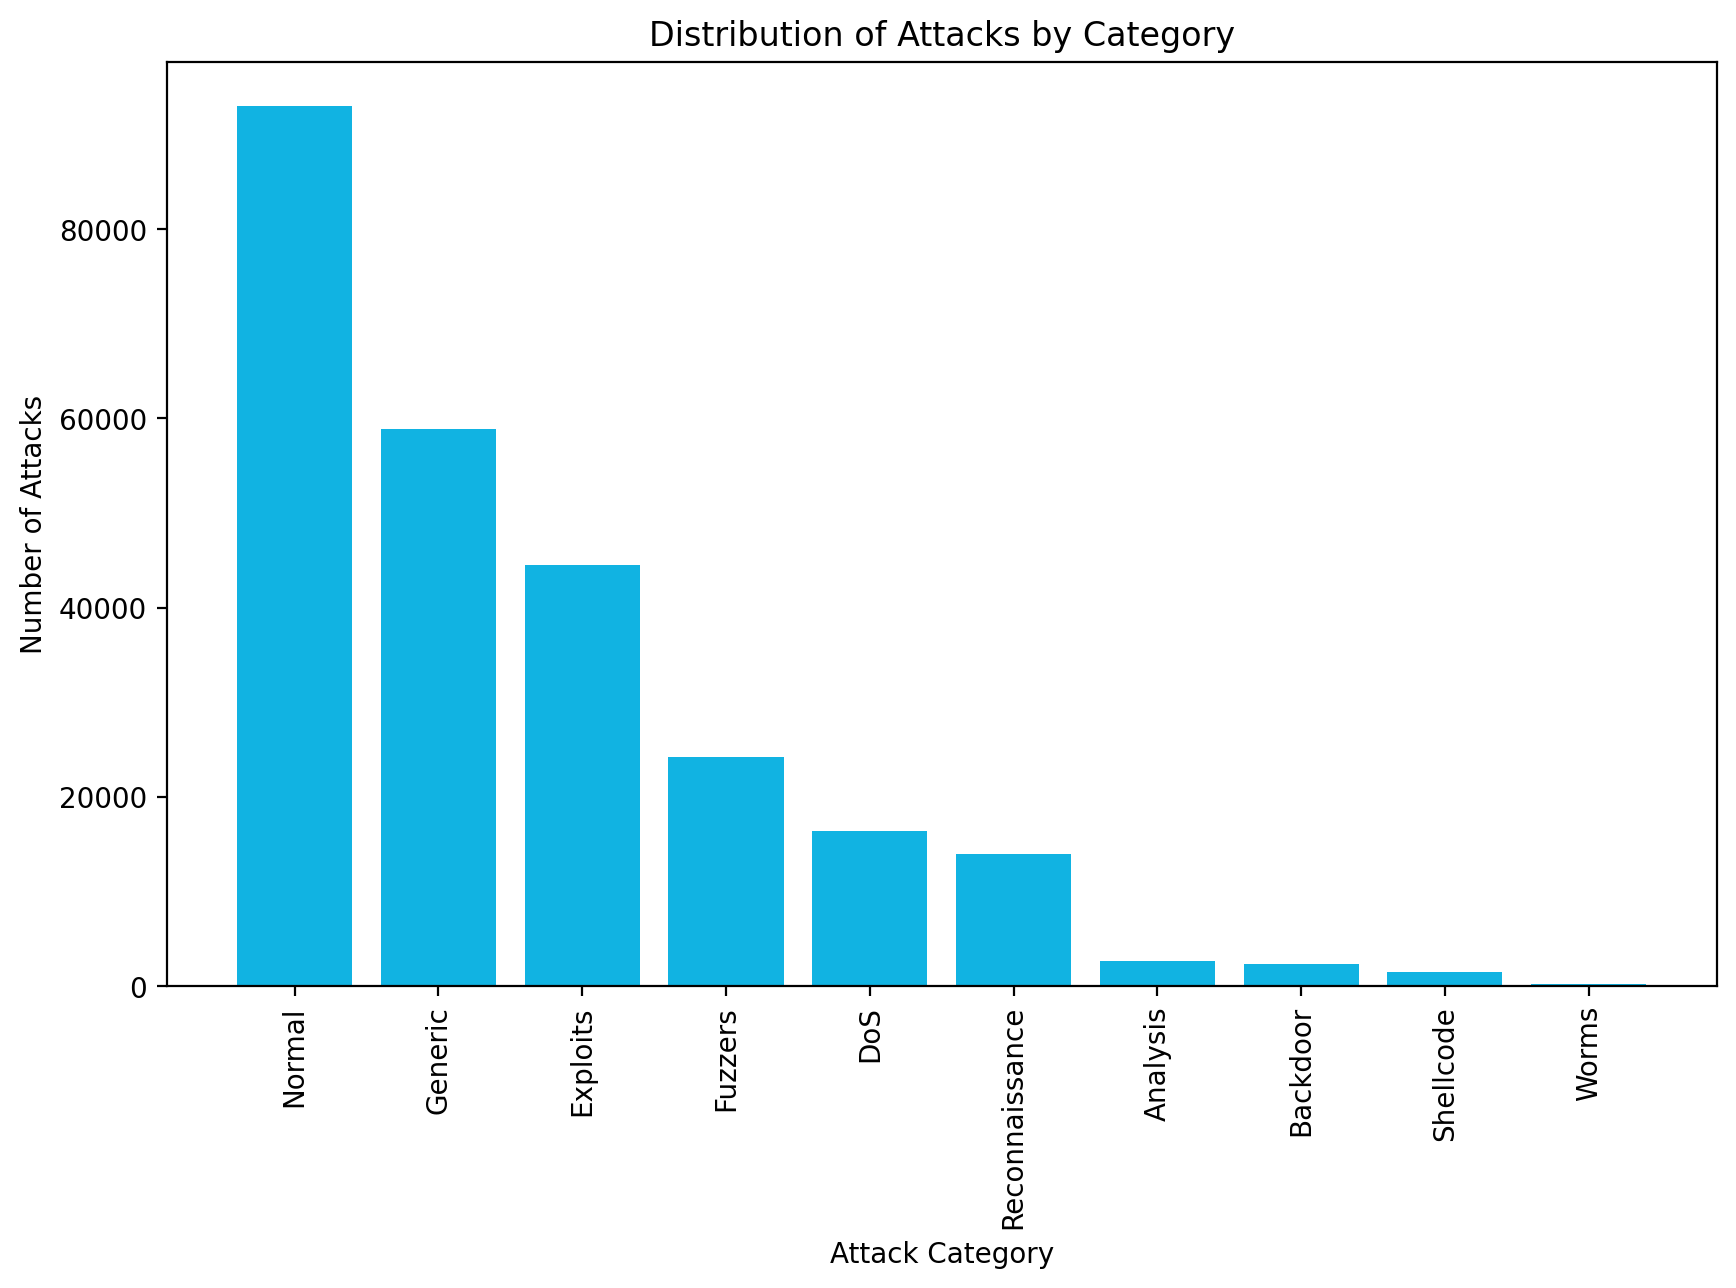

In [46]:
attack_cat_counts = df.groupby('attack_cat')['attack_cat'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(attack_cat_counts.index, attack_cat_counts.values, color='#11b3e2')
plt.xlabel('Attack Category')
plt.ylabel('Number of Attacks')
plt.title('Distribution of Attacks by Category')
plt.xticks(rotation=90)
plt.show()


The graph shows the distribution of attacks by category in the dataset. "Generic" is the most common category, followed by "Exploits," "Fuzzers," "DoS" (Denial of Service), "Reconnaissance," "Analysis," "Backdoors," and "Shellcode."

Generic: refers to attacks that cannot be classified in a specific category or have not been identified as a specific attack type.
Exploits: refer to attacks that take advantage of vulnerabilities in software, hardware, or network protocols to gain unauthorized access or control over a system.
Fuzzers: refer to attacks that send large amounts of random or malformed data to an application or system in order to find vulnerabilities.
DoS (Denial of Service): refer to attacks that aim to make a network or system unavailable to its intended users by flooding it with traffic or exploiting vulnerabilities.
Reconnaissance: refers to attacks that gather information about a target network or system, often for the purpose of planning a more targeted attack.
Analysis: refers to attacks that involve analyzing the behavior of a system or network to gain unauthorized access or extract sensitive information.
Backdoors: refer to attacks that create a hidden method of access to a system, allowing an attacker to bypass normal authentication procedures and gain access at a later time.
Shellcode: refers to code that is injected into a vulnerable system or application, allowing an attacker to execute arbitrary commands or code on that system.
The reason why these categories are higher than others is likely due to the prevalence of these types of attacks in real-world situations. For example, "Exploits" and "DoS" attacks are commonly used by hackers to gain access to systems or disrupt services, while "Reconnaissance" is often used as a precursor to a more targeted attack. Overall, the distribution of attacks by category provides insight into the types of threats that organizations should be aware of and prepared to defend against.
>
The specific attack categories that are the higher ones in the dataset are likely more prevalent because they are commonly used and effective methods for attackers to compromise systems or networks.

Exploits: Exploits are pieces of software or code that take advantage of vulnerabilities in software or systems to gain unauthorized access, control, or sensitive data. They are a common and effective method for attackers to compromise systems.
Fuzzers: Fuzzers are tools that automatically generate large volumes of random data to test for vulnerabilities in software or systems. They are often used by attackers to identify weaknesses that can be exploited.
DoS (Denial of Service): DoS attacks are designed to disrupt or disable access to a system or network by overwhelming it with traffic or other types of requests. They are a common method for attackers to disrupt critical systems or services.
Reconnaissance: Reconnaissance attacks are designed to gather information about a target system or network, such as identifying vulnerabilities or finding user credentials. They are often used as a precursor to more sophisticated attacks.
Analysis: Analysis attacks are designed to gather data and intelligence about a target system or network, such as user accounts, system configurations, and network topology. This information can then be used to identify vulnerabilities and plan future attacks.
Backdoor: Backdoors are hidden access points or mechanisms that allow attackers to gain persistent access to a compromised system or network. They are often used by attackers to maintain control over a system or network even after being detected and removed.
Shellcode: Shellcode is code that is used to exploit vulnerabilities in software or systems to gain unauthorized access or control. It is often used by attackers to run malicious code on compromised systems or to gain administrative access to a system.
Overall, these attack categories are common and effective methods for attackers to compromise systems or networks and achieve their objectives, which is why they are the higher ones in the dataset.





>
The "Generic" attack category refers to attacks that are not easily classified into other categories. These attacks may be new or unique types of attacks that do not fit into any specific category or attacks that are not well-understood yet. Therefore, the "Generic" category is often used as a catch-all category for attacks that do not fit into other categories. It is not surprising that the "Generic" category has a significant number of attacks, as it includes a diverse range of attacks that are not easily classified into other categories.





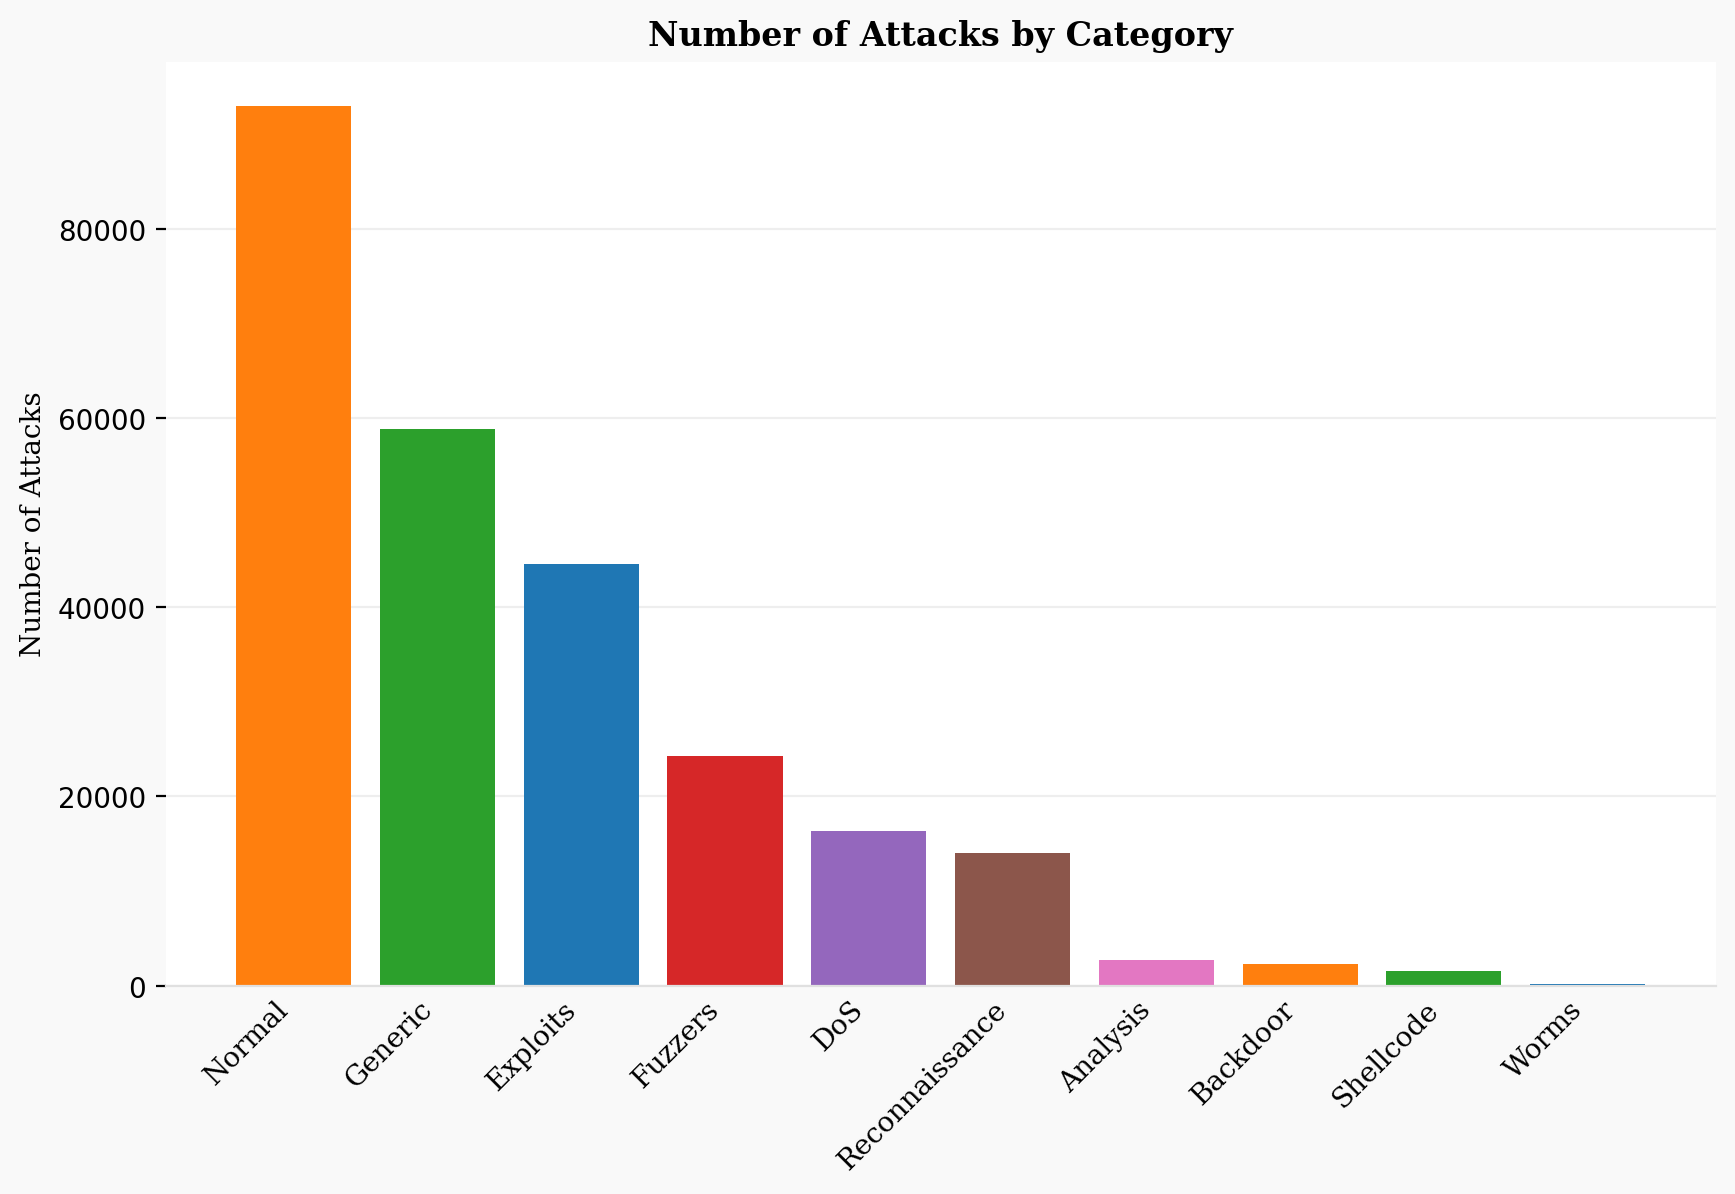

In [47]:
df = df[df['attack_cat'].notnull()]
attack_counts = df['attack_cat'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(attack_counts.index, attack_counts, color=['#ff7f0e', '#2ca02c', '#1f77b4', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
ax.set_xticklabels(attack_counts.index, rotation=45, ha='right', fontfamily='serif')
ax.set_ylabel('Number of Attacks', fontfamily='serif')
ax.set_title('Number of Attacks by Category', fontweight='bold', fontfamily='serif')
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.spines['bottom'].set_color('#e0e0e0')
ax.tick_params(axis='x', length=0)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#eeeeee')
fig.patch.set_facecolor('#f9f9f9')

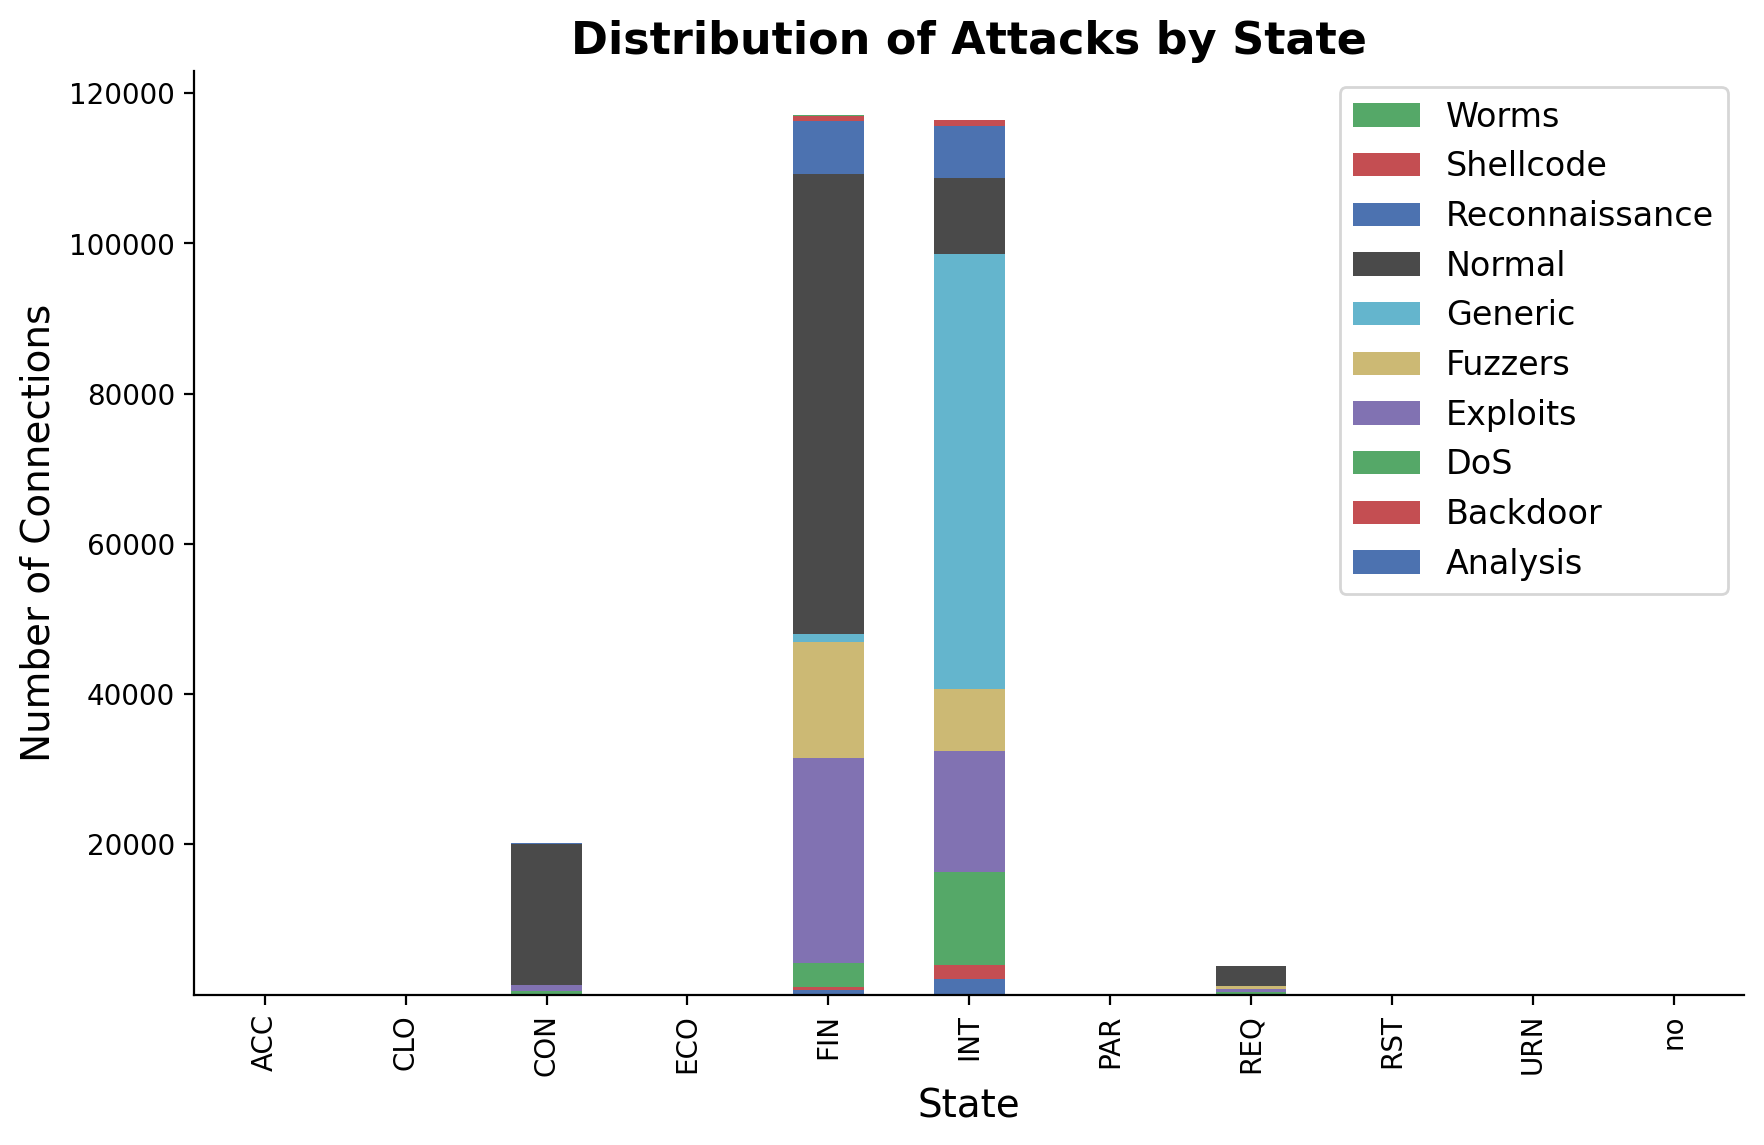

In [48]:


df.replace(" ", float("NaN"), inplace=True)

df.dropna(inplace=True)

grouped = df.groupby(["state", "attack_cat"])["id"].count().unstack()

ax = grouped.plot(kind="bar", stacked=True, figsize=(10,6), 
                  color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD", "#4A4A4A"])

ax.set_title("Distribution of Attacks by State", fontsize=16, fontweight="bold")
ax.set_xlabel("State", fontsize=14)
ax.set_ylabel("Number of Connections", fontsize=14)

# Hide the legend title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="", fontsize=12)

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.show()



The reason why "GENERIC ATTACK" is the most common attack category in the "INT" state is likely due to the fact that the "INT" state represents an intermediate state in the connection establishment process between the source and destination hosts. During this stage, the source host is attempting to establish a connection with the destination host by sending a SYN packet.

An attacker can take advantage of this by sending multiple SYN packets to the destination host in a short period of time, overwhelming the host and causing it to slow down or crash. This type of attack is known as a SYN flood attack and falls under the "GENERIC ATTACK" category.

As for why "EXPLOITS" is the second most common attack category in the "INT" state, this may be because attackers often use exploits to take advantage of vulnerabilities in a system's software during the connection establishment process.

Regarding the "DOS" attack category being the third most common in the "INT" state, this is likely due to the fact that DOS (Denial of Service) attacks can be used to overwhelm a system's resources during the connection establishment process, preventing legitimate connections from being established.

Finally, the "RECONNAISSANCE" attack category being the fourth most common in the "INT" state is likely due to the fact that attackers may use reconnaissance techniques to gather information about a target system during the connection establishment process, allowing them to identify vulnerabilities and plan future attacks.

>

In the FIN state, the attacks are typically characterized by the use of the FIN (finish) flag in the TCP three-way handshake. This flag is used to indicate that the sender has finished sending data and wants to close the connection.

The reason why attacks such as exploits, fuzzers, reconnaissance, analysis, dos, and worms are higher in the FIN state is because attackers can use the FIN flag to create and exploit vulnerabilities in network protocols and services. For example, an attacker might send a packet with the FIN flag set to a server, which causes the server to close the connection without properly terminating any open sessions. This can lead to a denial of service attack or even allow the attacker to take control of the server.

The higher number of normal connections in the FIN state may be due to the fact that the FIN flag is typically used to close a connection after data has been transmitted, indicating that the communication has ended normally. This is in contrast to other states like CON (established), where the connection is still active and data can continue to be exchanged. As a result, the FIN state may be more common in normal network activity, as many network protocols and services use the FIN flag to close connections once data has been transmitted.


>>>>recap

>>the attack categories that are common in the "INT" state, which is the state where the connection establishment process between the source and destination hosts is ongoing. The "GENERIC ATTACK" category is the most common because attackers can take advantage of the connection establishment process to launch a SYN flood attack. The "EXPLOITS" category is also common in the "INT" state because attackers can use exploits to take advantage of vulnerabilities in a system's software during the connection establishment process. The "DOS" category is another common attack category because attackers can use DOS attacks to overwhelm a system's resources during the connection establishment process. The "RECONNAISSANCE" category is also common because attackers may use reconnaissance techniques to gather information about a target system during the connection establishment process.

>>the attack categories that are common in the "FIN" state, which is the state where the sender has finished sending data and wants to close the connection. The higher number of attacks such as exploits, fuzzers, reconnaissance, analysis, dos, and worms in the "FIN" state is due to the fact that attackers can use the FIN flag to create and exploit vulnerabilities in network protocols and services. For example, an attacker might send a packet with the FIN flag set to a server, which causes the server to close the connection without properly terminating any open sessions. The higher number of normal connections in the "FIN" state may be due to the fact that the FIN flag is typically used to close a connection after data has been transmitted, indicating that the communication has ended normally.

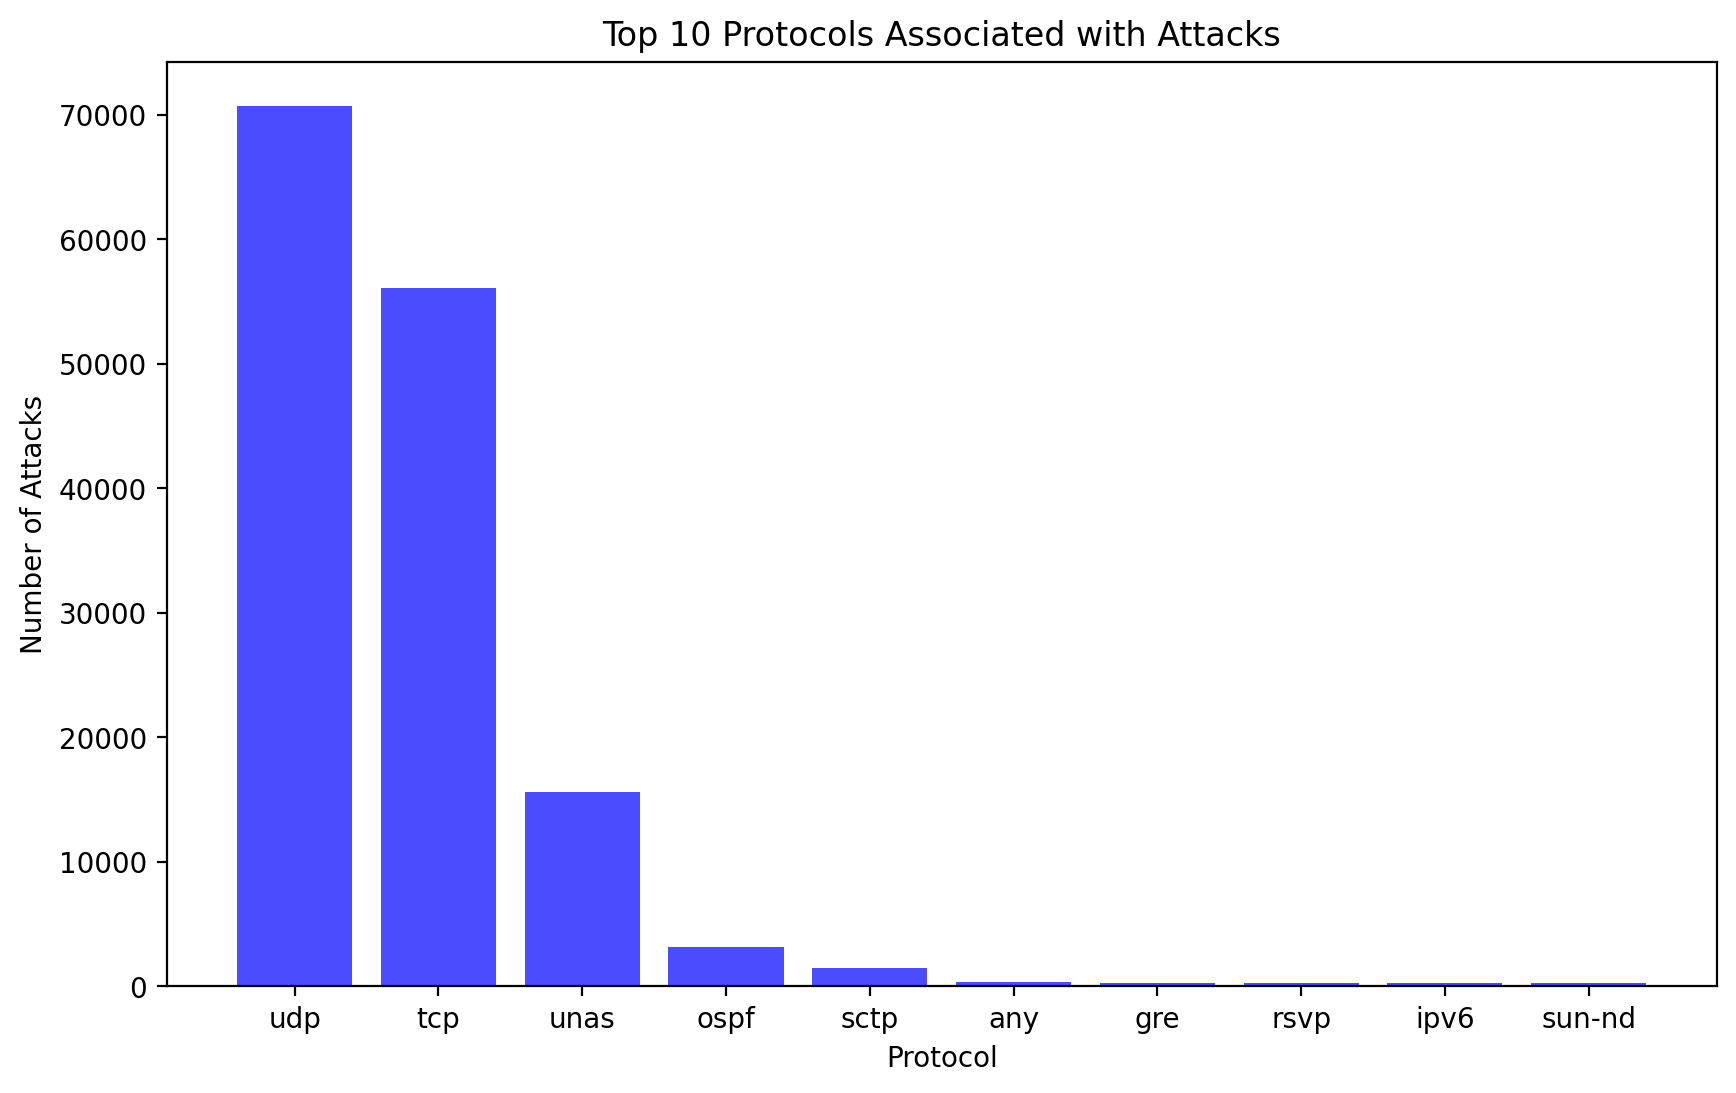

In [49]:


df.replace(" ", float("NaN"), inplace=True)

df.dropna(inplace=True)

df["attack_type"] = df["attack_cat"].apply(lambda x: "Normal" if x == "Normal" else "Attack")

top_proto = df[df['attack_type'] == 'Attack']['proto'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
plt.bar(top_proto.index, top_proto.values, color='blue', alpha=0.7)
plt.title('Top 10 Protocols Associated with Attacks')
plt.xlabel('Protocol')
plt.ylabel('Number of Attacks')
plt.show()

>TCP (Transmission Control Protocol): This is the most commonly used protocol for transferring data over the internet. It provides reliable, ordered, and error-checked delivery of data between applications running on hosts communicating over an IP network.

>UDP (User Datagram Protocol): This is a lightweight protocol that does not provide the reliability or error checking of TCP. It is often used for streaming media or other real-time applications where dropped packets are less important than low latency.



>UNAS (Unknown Non-Application Specific Protocol): This protocol is not well-known or documented, and there is little information available about it.


>ARP (Address Resolution Protocol): This protocol is used to map a network address (such as an IP address) to a physical address (such as a MAC address) on a local network.


>OSPF (Open Shortest Path First): This is a popular routing protocol used to determine the shortest path for routing IP packets across a network.


>SCTP (Stream Control Transmission Protocol): This is a transport-layer protocol that provides reliable, message-oriented transport of data between applications.


>ANY (Wildcard protocol): This protocol represents all protocols and is used when the specific protocol is not relevant or unknown.


>GRE (Generic Routing Encapsulation): This protocol is used to encapsulate one protocol over another protocol for transport across an IP network.


>RSVP (Resource Reservation Protocol): This protocol is used to reserve network resources (such as bandwidth) for specific applications or services.


>IPv6 (Internet Protocol version 6): This is the most recent version of the Internet Protocol, which provides a larger address space and other improvements over the previous version (IPv4).





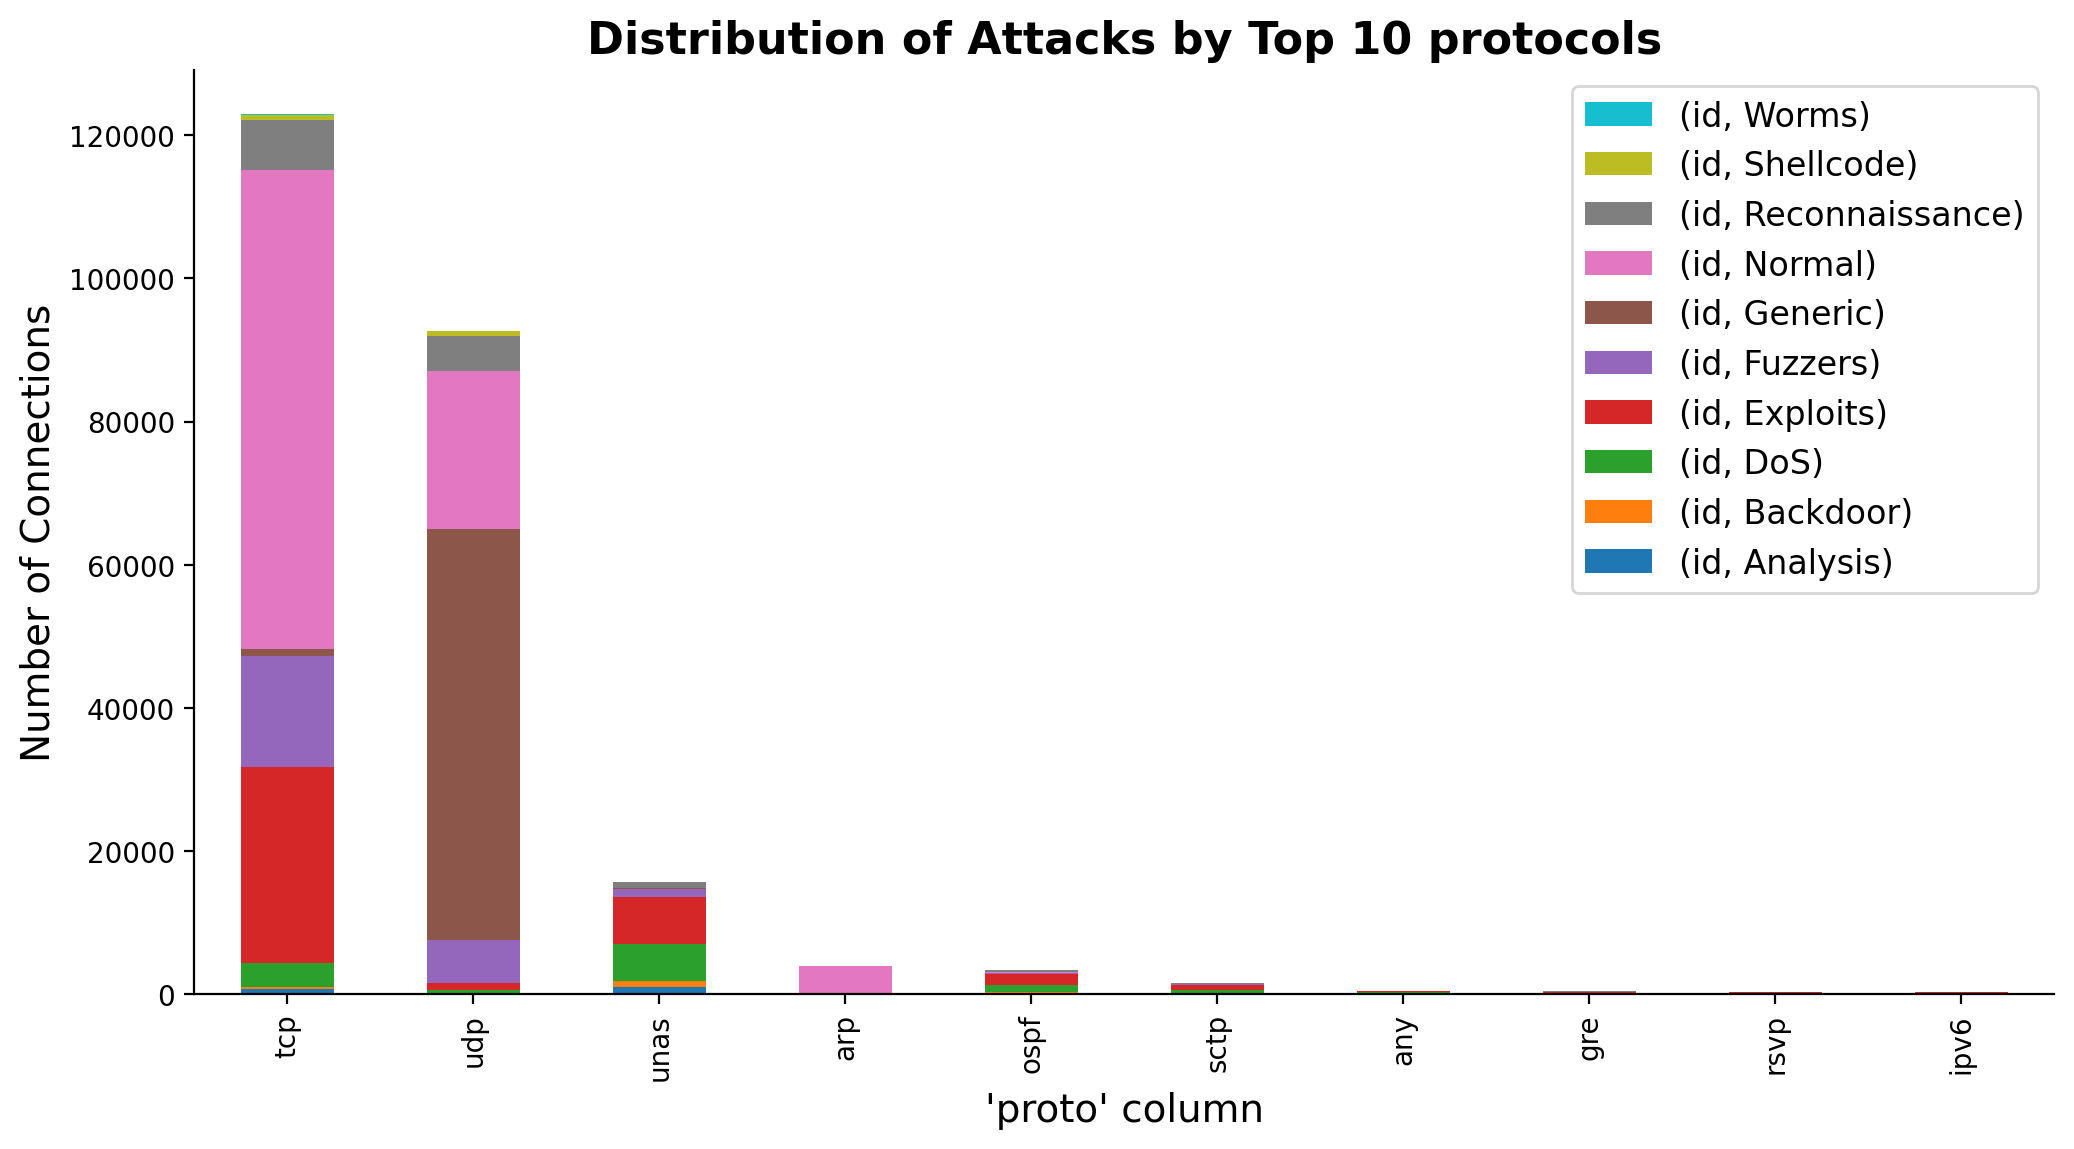

In [50]:


df.replace(" ", float("NaN"), inplace=True)
df.dropna(inplace=True)
grouped = df.groupby(["proto", "attack_cat"]).agg({"id": "count"}).unstack()
top10_proto = grouped.sum(axis=1).sort_values(ascending=False).head(10).index
grouped_top10 = grouped.loc[top10_proto]
ax = grouped_top10.plot(kind="bar", stacked=True, figsize=(12,6), 
                        color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
                               "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

ax.set_title("Distribution of Attacks by Top 10 protocols", fontsize=16, fontweight="bold")
ax.set_xlabel("'proto' column", fontsize=14)
ax.set_ylabel("Number of Connections", fontsize=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="", fontsize=12)

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
plt.show()

bar chart that shows the top 10 protocols associated with attacks in the dataset. The x-axis represents the protocol name and the y-axis represents the number of attacks associated with each protocol.

According to the chart, the most common protocol associated with attacks is TCP, followed by UDP, ICMP, and so on. However, the focus of the analysis is on the TCP protocol.

TCP (Transmission Control Protocol) is a widely used protocol in computer networks for transmitting data between hosts. It provides a reliable, ordered, and error-checked delivery of data packets.

In the chart, it can be observed that TCP is the most common protocol associated with attacks, both normal and malicious. However, the types of attacks associated with TCP in normal connections versus attack connections are different. In normal connections, TCP is used for normal communication between hosts, whereas in attack connections, TCP is used to carry out various types of attacks.

The reason why TCP is associated with the "exploits", "fuzzers", "reconnaissance", and "DOS" attack categories is likely due to the fact that TCP provides several mechanisms that can be exploited by attackers to disrupt or manipulate network traffic.

For example, attackers can use exploits to take advantage of vulnerabilities in a system's software that uses TCP, such as a web server that runs on TCP port 80. Attackers can also use fuzzers to generate malformed TCP packets that can crash or exploit a vulnerable system.

Additionally, attackers can use reconnaissance techniques to gather information about a target system, such as identifying open TCP ports and services, which can then be used to launch more targeted attacks.

Finally, DOS attacks can be carried out by flooding a target system with a large number of TCP packets, overwhelming the system's resources and causing it to slow down or crash.

In conclusion, the TCP protocol is commonly used in both normal and malicious network traffic. However, the types of attacks associated with TCP in normal and malicious traffic are different, with attackers exploiting various mechanisms provided by TCP to carry out their attacks.

>

> UDP
>
 the UDP protocol, the most common type of connection is "Normal", followed by "Generic", "Fuzzers", and "Reconnaissance".

The reason why "Normal" connections are the most common for UDP is likely due to the fact that UDP is a connectionless protocol, meaning that no prior connection setup is needed before sending data. This makes it more suitable for certain types of applications such as streaming or real-time gaming, where a continuous stream of data is sent without the need for a persistent connection.

As for why "Generic" attacks are the second most common for UDP, this may be because attackers can use UDP packets to send malicious payloads or launch attacks such as UDP flood attacks, which involve overwhelming a target system with a high volume of UDP packets, leading to denial of service or system crash.

The "Fuzzers" attack category being the third most common for UDP is likely due to the fact that fuzzing is a common technique used to find vulnerabilities in network protocols, including UDP. Attackers may use fuzzers to generate malformed or unexpected UDP packets in an attempt to trigger bugs or crashes in the target system.

Finally, the "Reconnaissance" attack category being the fourth most common for UDP is likely due to the fact that attackers may use reconnaissance techniques to gather information about a target system or network using UDP packets, such as scanning for open ports or identifying network services.

>



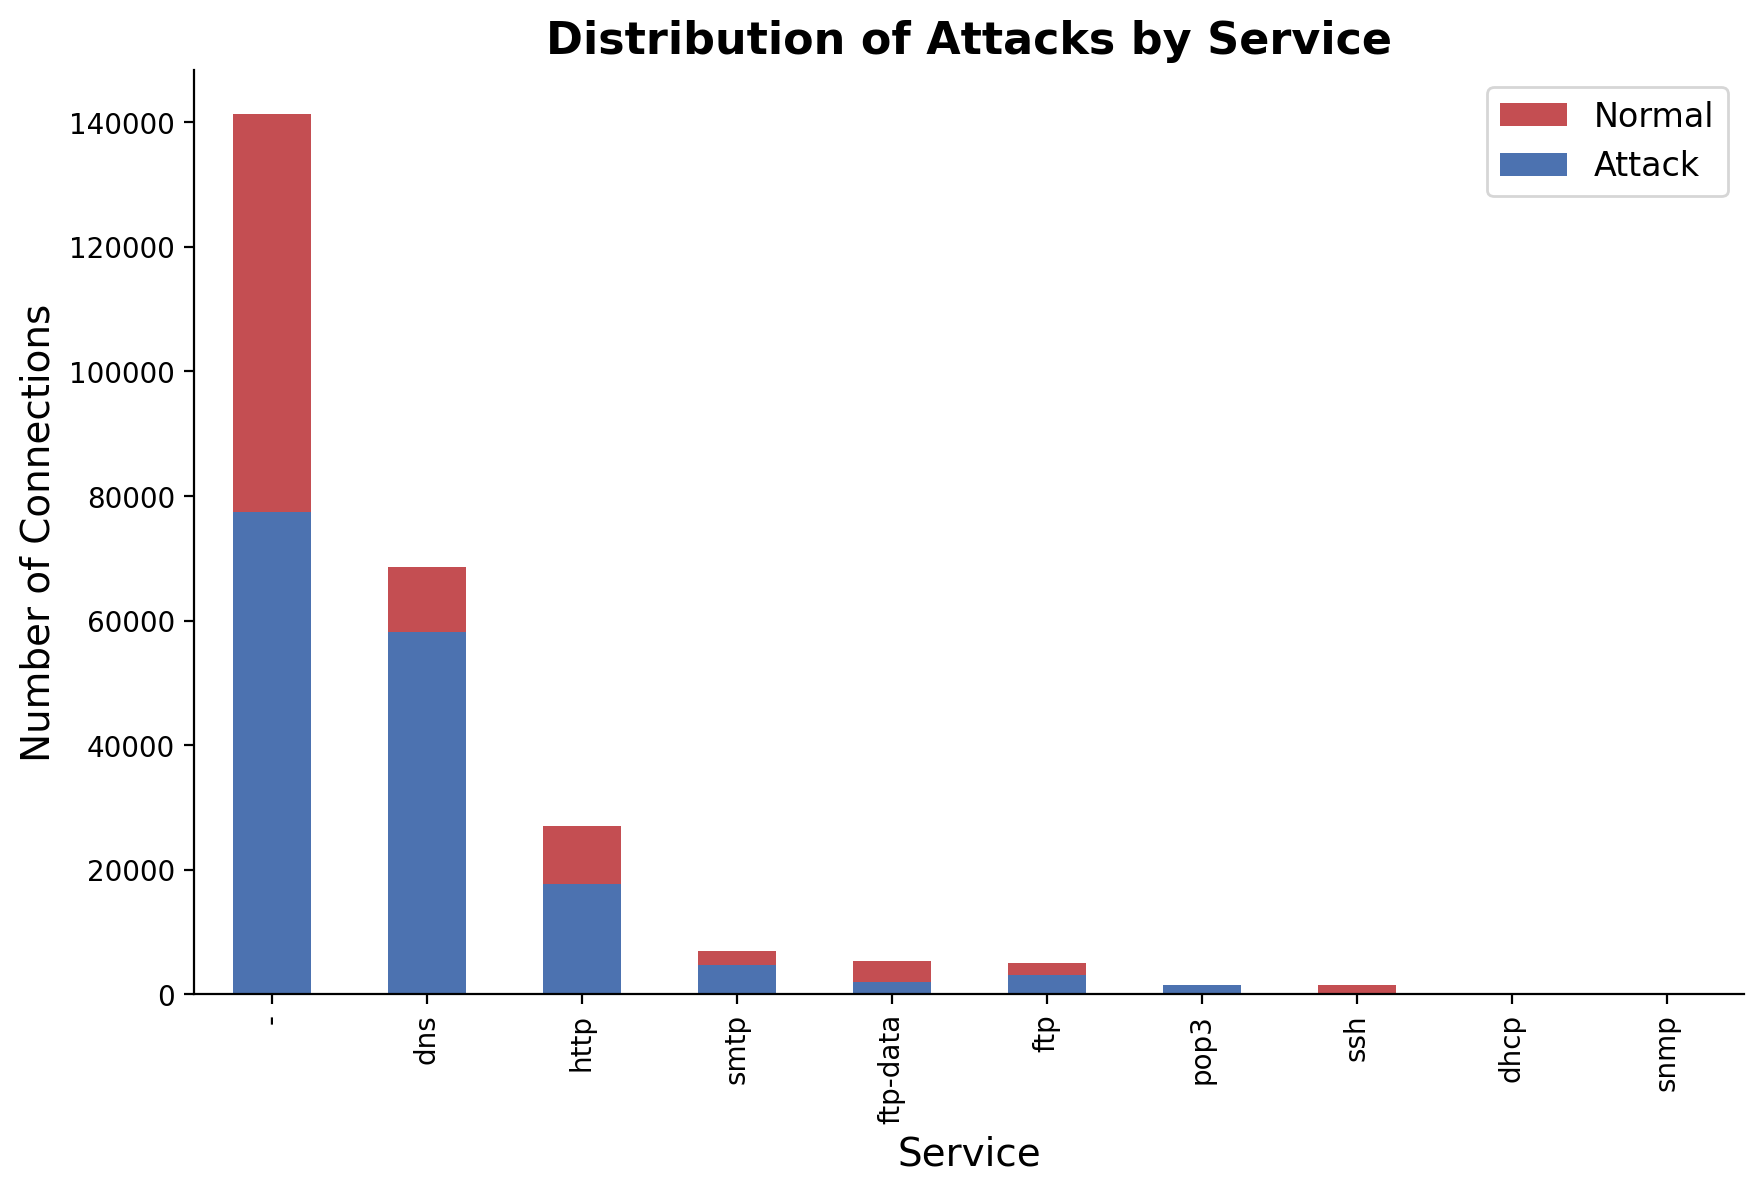

In [51]:
df.replace(" ", float("NaN"), inplace=True)

df.dropna(inplace=True)

df["attack_type"] = df["attack_cat"].apply(lambda x: "Normal" if x == "Normal" else "Attack")

grouped = df.groupby(["service", "attack_type"])["id"].count().unstack()

top10_services = grouped.sum(axis=1).sort_values(ascending=False).head(10).index.tolist()

grouped = grouped.loc[top10_services]

ax = grouped.plot(kind="bar", stacked=True, figsize=(10,6), 
                  color=["#4C72B0", "#C44E52"])

ax.set_title("Distribution of Attacks by Service", fontsize=16, fontweight="bold")
ax.set_xlabel("Service", fontsize=14)
ax.set_ylabel("Number of Connections", fontsize=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="", fontsize=12)

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)


plt.show()



Text(0, 0.5, 'Number of Connections')

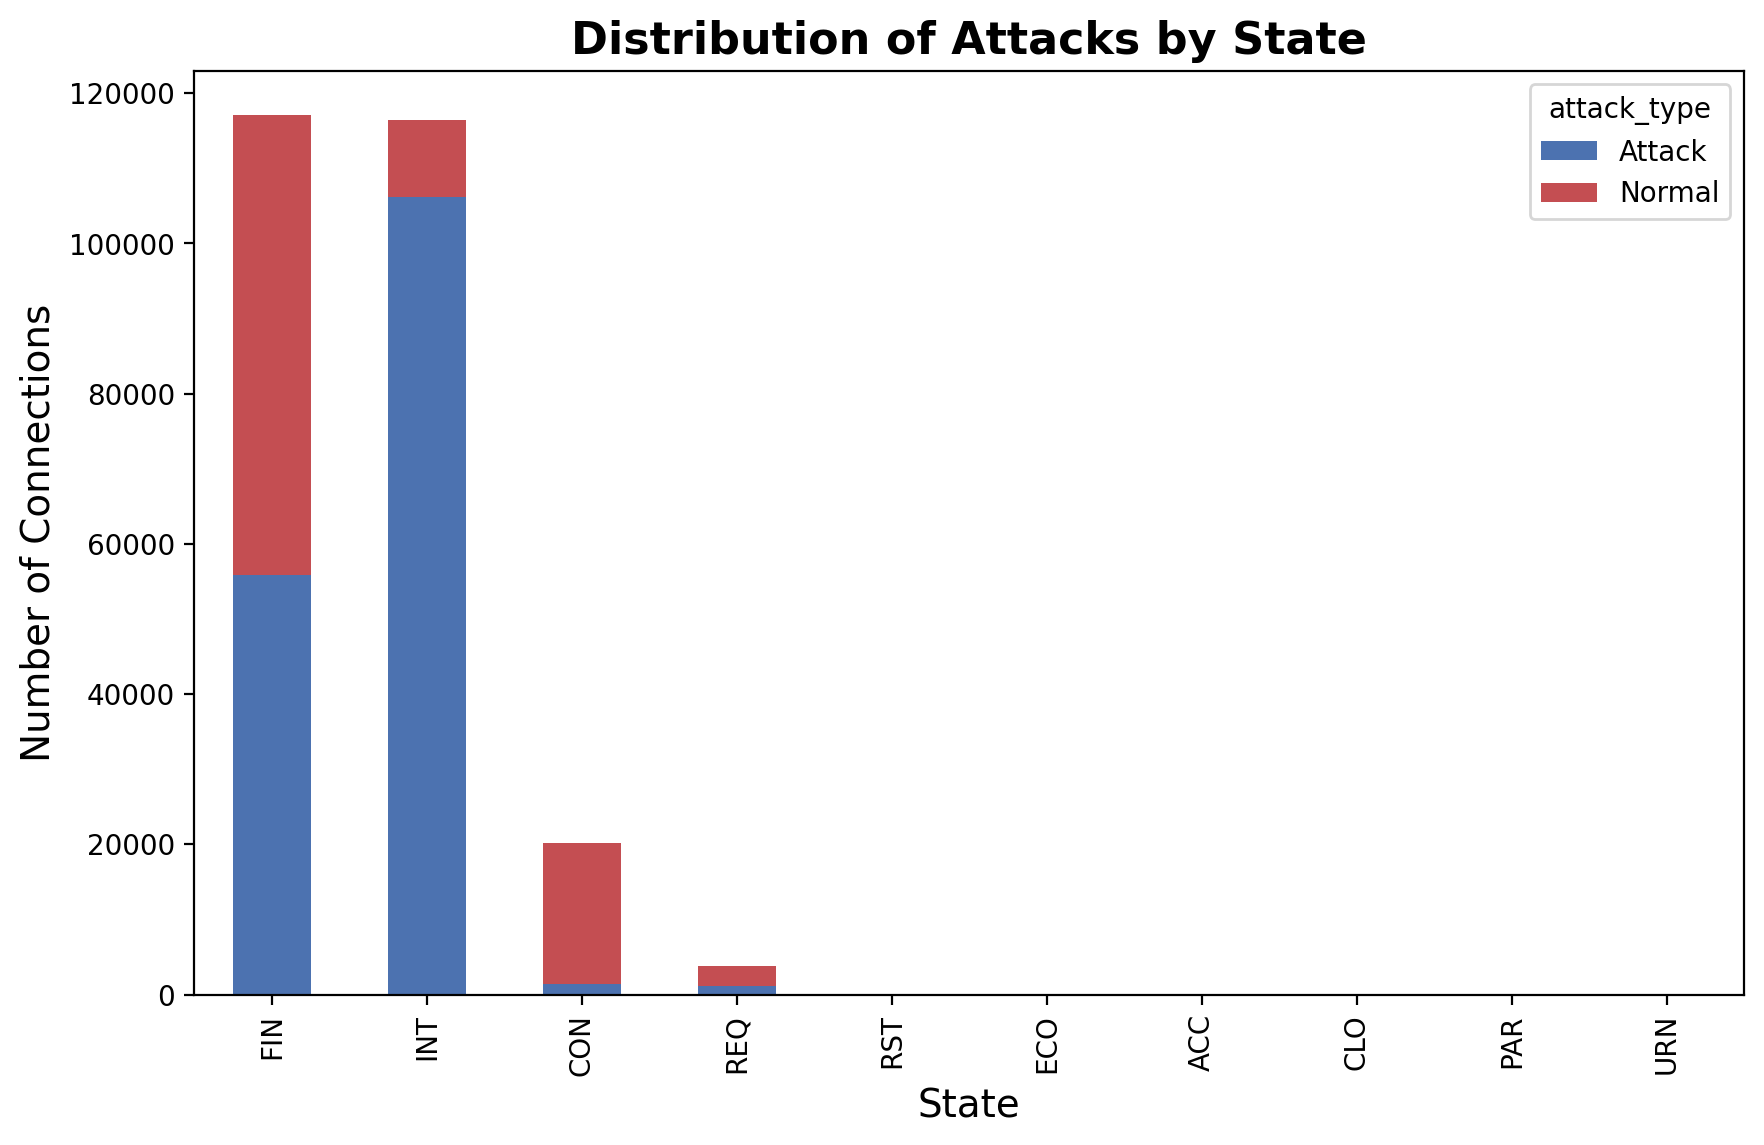

In [52]:
df.replace(" ", float("NaN"), inplace=True)
df.dropna(inplace=True)
df["attack_type"] = df["attack_cat"].apply(lambda x: "Normal" if x == "Normal" else "Attack")
grouped = df.groupby(["state", "attack_type"])["id"].count().unstack().fillna(0)
total_connections = grouped.sum(axis=1)
sorted_states = total_connections.sort_values(ascending=False).index[:10]
grouped = grouped.loc[sorted_states]
colors = ['#4C72B0', '#C44E52']
ax = grouped.plot(kind="bar", stacked=True, figsize=(10,6), color=colors)
ax.set_title("Distribution of Attacks by State", fontsize=16, fontweight="bold")
ax.set_xlabel("State", fontsize=14)
ax.set_ylabel("Number of Connections", fontsize=14)

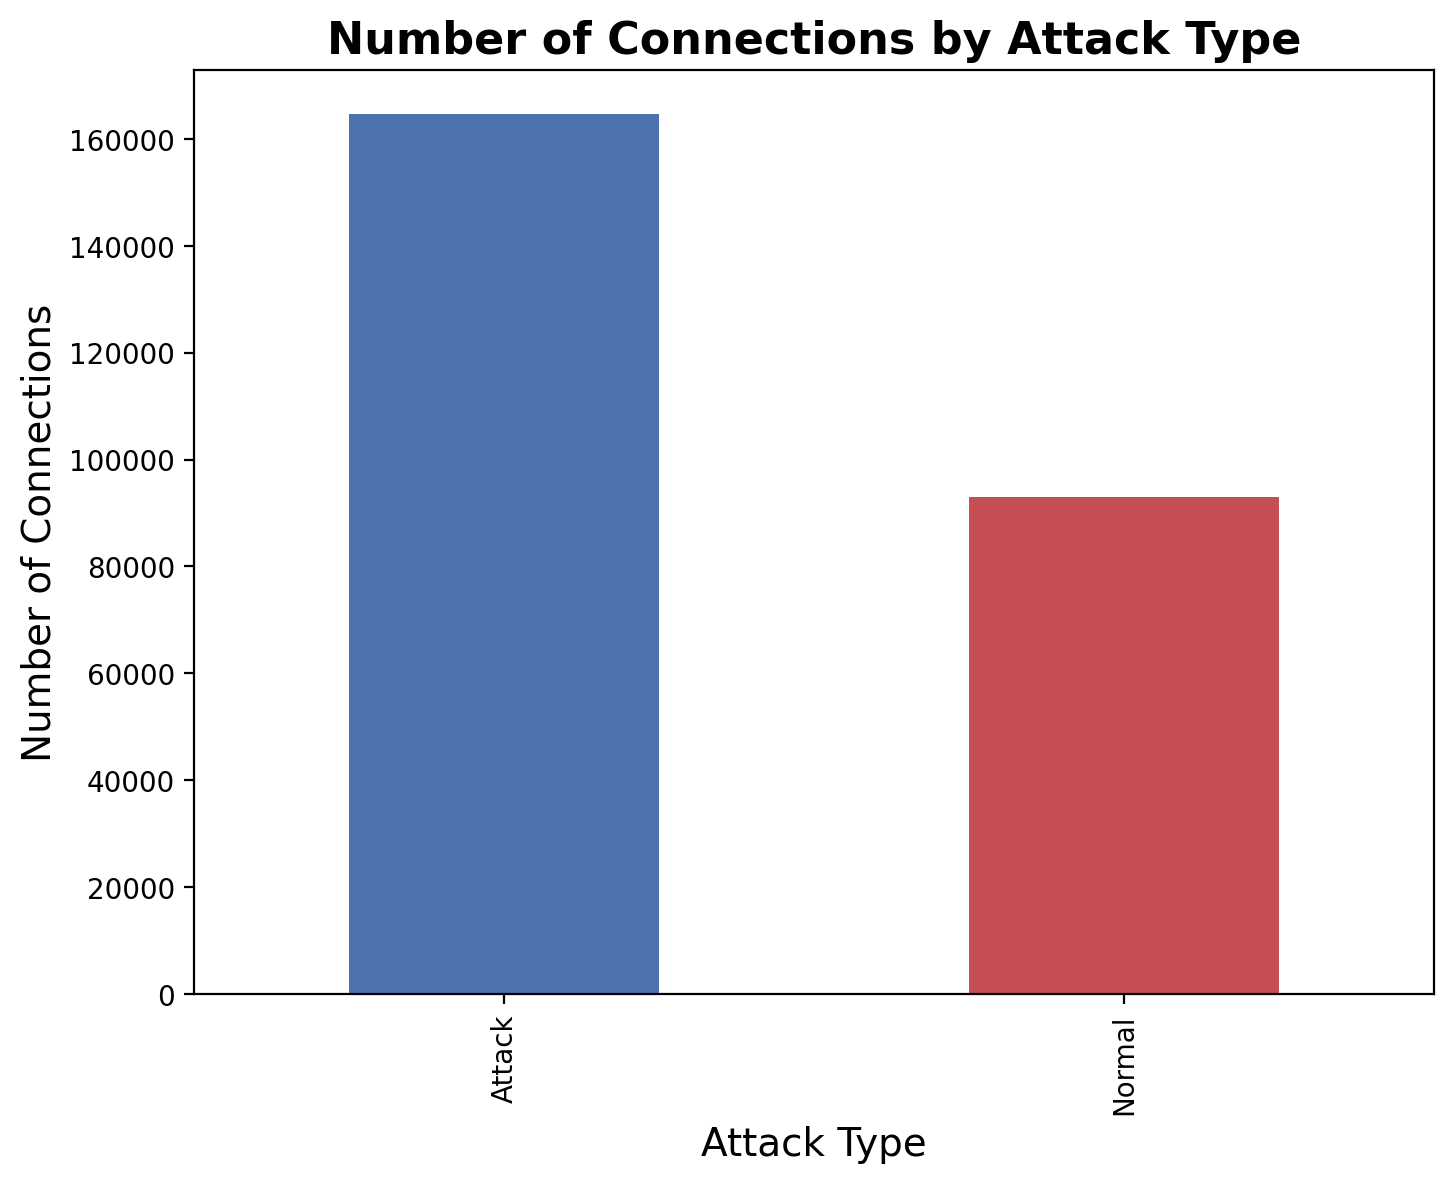

In [53]:
df=pd.read_csv("pfe_dataset.csv")
df["attack_type"] = df["attack_cat"].apply(lambda x: "Normal" if x == "Normal" else "Attack")
grouped = df.groupby(["attack_type"])["id"].count()
ax = grouped.plot(kind="bar", figsize=(8,6), color=["#4C72B0", "#C44E52"])
ax.set_title("Number of Connections by Attack Type", fontsize=16, fontweight="bold")
ax.set_xlabel("Attack Type", fontsize=14)
ax.set_ylabel("Number of Connections", fontsize=14)
plt.show()

>>represents the state of the TCP connection at the end of the flow. It is a categorical feature that can take on one of the following values:

*FIN: This value indicates that the connection has been closed by the sender and that no more data will be sent.

*INT: This value indicates that the connection is in an intermediate state and that data is still being transmitted.

*CON: This value indicates that the connection has been established and that data is being transmitted.

*REQ: This value indicates that the connection is in the process of establishing a connection and that a request has been sent.

*RST: This value indicates that the connection has been reset.

*ECO: This value indicates that the connection has been established but no data has been transmitted.

*ACC: This value indicates that the connection request has been accepted.

*CLO: This value indicates that the connection has been closed.

*PAR: This value indicates that the connection is in the process of being established and that a response has been sent.

*URN: This value indicates that the connection request has been rejected.

*no: This value indicates that the state of the connection could not be determined.


The state column is useful in identifying the nature of the network traffic and can be used in various network security applications such as intrusion detection, network traffic analysis, and anomaly detection.



